



























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































# **Credit Card Fraud Detection**
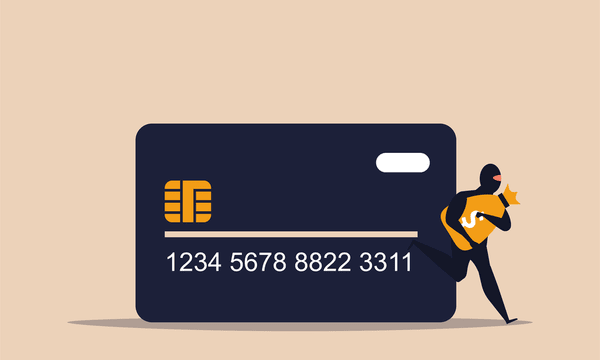

[Image download here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fpngtree.com%2Ffree-png-vectors%2Fcredit-card-fraud&psig=AOvVaw25A2tFBaC5rqJH97oX3Db0&ust=1681215910933000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCPCDxsqon_4CFQAAAAAdAAAAABAE)


In this Project, We are going to build **a model** to detect credit card fraud as well as **evaluate** the model with **the highest efficacy**. 

## Background of Dataset
This is a transaction simulator dataset in which it contains transations made by credit cards holders in Europe. It is an open dataset from Kaggle. 

Dataset link [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

## Load Libraries


In [1]:
# Libraries for Data Wrangling and Manipulations  
import pandas as pd
from pandas.plotting import scatter_matrix
from collections import Counter
import numpy as np
from scipy.stats import uniform, randint

# Library to export results table to Excel file
import openpyxl

# Libraries for plots and visualisations
import matplotlib
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
import scikitplot as skplt

# for interactive plots we used widget from ipympl library
#%matplotlib widget 

import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import missingno as msno
from mlxtend.classifier import StackingCVClassifier
import warnings

# Library to accelerate Scikit-learn applications 
from sklearnex import patch_sklearn 

#For more info: https://github.com/intel/scikit-learn-intelex
patch_sklearn()

import sklearn
from sklearn import metrics

# split into train and test, do grid search for hyperparameter optimization and
# do cross validation with stratified data
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import RobustScaler, power_transform
from sklearn.ensemble import IsolationForest, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE

from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from scikitplot.metrics import plot_roc_curve, plot_precision_recall, plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, auc
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split # for splitting our data set into training and testing
from sklearn import preprocessing, svm, tree
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, v_measure_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.cluster import KMeans, DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import ADASYN
import hyperopt 
from hyperopt.pyll import scope
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

# Lirabries to Explain Our Models
import lime 
import lime.lime_tabular

sns.set()
py.offline.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
np.random.seed(0)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Load our data set
The dataset was downloaded from Kaggle public datasets and link can be found [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

The dataset was uploaded from my goodgle drive using google colap's import package, google.colab (import drive).

In [2]:
crecard_df = pd.read_csv('creditcard.csv')

## Basic Exploratory Data Analysis (BEDA)
In the analysis, we will explore our dataset to know more about it. This will help us know more about our data and what we will be working with.  This is because the analysis allows us to obtain a snipet of the characteristics of the data we are working with, including the number of observations, the type of variables and our data was distributed. Understanding these fundamentals about our data enables us as data scientists to make arrive at data driven recommendations to support data driven decision-making. 

### View the some records of our dataframe

In [4]:
print('Displaying the first ten records from the dataframe:')
crecard_df.head(10)

Displaying the first ten records from the dataframe:


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  
6 -0.257237  0.034507  0.005168    4.99      0  
7 -0.051634 -1.206921 -1.085339   40.80      0  
8 -0.384157  0.011747  0.142404   93.20      0  
9  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 31 columns]

In [5]:
print('Displaying the last 10 records from the dataframe:')
crecard_df.tail(10)

Displaying the last 10 records from the dataframe:


Time         V1         V2        V3        V4        V5  \
284797  172782.0  -0.241923   0.712247  0.399806 -0.463406  0.244531   
284798  172782.0   0.219529   0.881246 -0.635891  0.960928 -0.152971   
284799  172783.0  -1.775135  -0.004235  1.189786  0.331096  1.196063   
284800  172784.0   2.039560  -0.175233 -1.196825  0.234580 -0.008713   
284801  172785.0   0.120316   0.931005 -0.546012 -0.745097  1.130314   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284797 -1.343668  0.929369 -0.206210  0.106234  ... -0.228876 -0.514376   
284798 -1.014307  0.427126  0.121340 -0.285670  ...  0.099936  0.337120   
284799  5.519980 -1.518185  2.080825  1.159498  ...  0.103302  0.654850   
284800 -0.726571  0.017050 -0.118228  0.435402  ... -0.268048 -0.717211   
284801 -0.235973  0.812722  0.115093 -0.204064  ... -0.314205 -0.808520   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284797  0.279598  0.371441 -0.559238  0.113144  0.131507  0.081265    5.49   
284798  0.251791  0.057688 -1.508368  0.144023  0.181205  0.215243   24.05   
284799 -0.348929  0.745323  0.704545 -0.127579  0.454379  0.130308   79.99   
284800  0.297930 -0.359769 -0.315610  0.201114 -0.080826 -0.075071    2.68   
284801  0.050343  0.102800 -0.435870  0.124079  0.217940  0.068803    2.69   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284797      0  
284798      0  
284799      0  
284800      0  
284801      0  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[10 rows x 31 columns]

### Check the dimension of the dataframe

In [6]:
print('It displays the dimension of the dataframe:', crecard_df.ndim)

It displays the dimension of the dataframe: 2


### Check the number of number of Elements in the Dataset

In [7]:
print('This displays the total elements in the dataframe:', crecard_df.shape)
print('It means that the dataframe has 284807 rows and 31 columns')

This displays the total elements in the dataframe: (284807, 31)
It means that the dataframe has 284807 rows and 31 columns


### Display distinct columns:


In [8]:
crecard_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
# printing the labels we will work with
print('These are the columns we will focus most on:')
list(crecard_df[['Time', 'Amount', 'Class']])

These are the columns we will focus most on:


['Time', 'Amount', 'Class']

### Let's have a general view of our dataset

In [11]:
# Display the general information of the dataframe
crecard_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can observe that the **crecard_df.info(verbose= True)** enables us to see the composition of our data set. It prints information of all the columns. From indication, all variables have non-null values. The varibales are made up of just one integer data type and thirty float data types. 

In [12]:
# Display only the data types in the dataset. 
crecard_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Summary Statistics

### Specific Statistical implications on Our Focused Group:
* Time
* Amount
* Class

In [13]:
print('This is the summary of the statistical measurements for:')
crecard_df[['Time', 'Amount', 'Class']].describe()

This is the summary of the statistical measurements for:


Time         Amount          Class
count  284807.000000  284807.000000  284807.000000
mean    94813.859575      88.349619       0.001727
std     47488.145955     250.120109       0.041527
min         0.000000       0.000000       0.000000
25%     54201.500000       5.600000       0.000000
50%     84692.000000      22.000000       0.000000
75%    139320.500000      77.165000       0.000000
max    172792.000000   25691.160000       1.000000

## Missing Values

### Check for missing values.
It is important to investigate if we have null values in our dataset. This is because with the presence of missing data, our model prediction will not be accurate. 

In [14]:
crecard_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Let us investigate further

In [15]:
# Checking for Null values and its counts in the dataset
crecard_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
# Let us sum all NA.
print('Total None Values:', crecard_df.isna().any().sum())

Total None Values: 0


### Visualise the missing values

<Axes: >

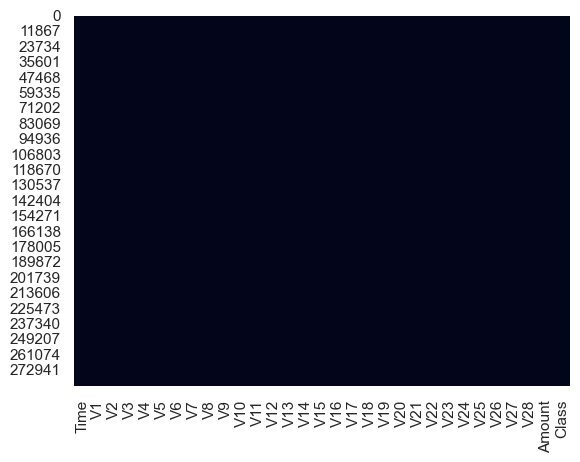

In [17]:
# Visualise the missing values with the seaborn heatmap
sns.heatmap(crecard_df.isnull(), cbar=False)

The above heatmap indicates that there are no missing values in our dataset. Maybe this module could not capture the missing values for us so we will explore further by using the bar plot from the missingno module.

<Axes: >

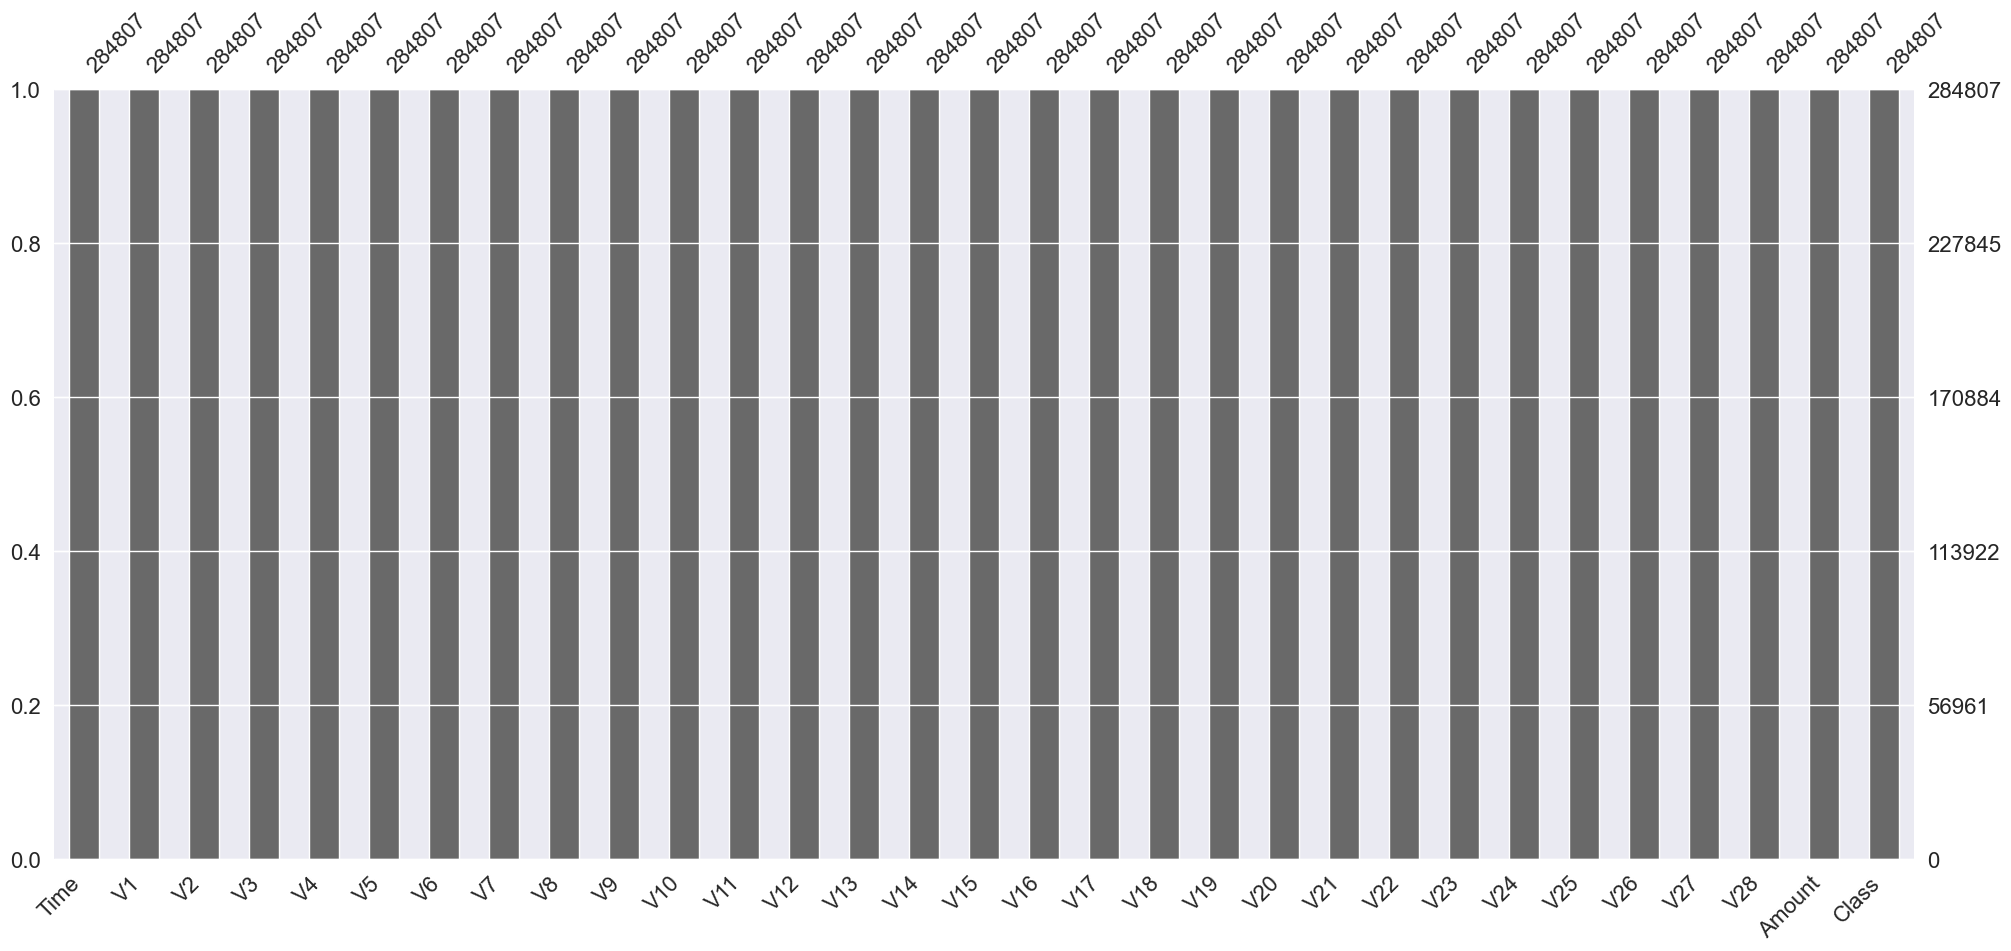

In [19]:
# Visualise the missing values with a matrix plot from the missingno module
msno.bar(crecard_df)

Here, we can see that all the **thirty-one variables** have all **284807 observations** present without any value missing.

### Checking the percentages of our missing values

In [20]:
percent_null_columns = pd.DataFrame({
    'Columns': crecard_df.isna().sum().index,
    'No. Null values': crecard_df.isna().sum().values,
    'Percentage': crecard_df.isna().sum().values/crecard_df.shape[0]
})
percent_null_columns

Columns  No. Null values  Percentage
0     Time                0         0.0
1       V1                0         0.0
2       V2                0         0.0
3       V3                0         0.0
4       V4                0         0.0
5       V5                0         0.0
6       V6                0         0.0
7       V7                0         0.0
8       V8                0         0.0
9       V9                0         0.0
10     V10                0         0.0
11     V11                0         0.0
12     V12                0         0.0
13     V13                0         0.0
14     V14                0         0.0
15     V15                0         0.0
16     V16                0         0.0
17     V17                0         0.0
18     V18                0         0.0
19     V19                0         0.0
20     V20                0         0.0
21     V21                0         0.0
22     V22                0         0.0
23     V23                0         0.0
24     V24                0         0.0
25     V25                0         0.0
26     V26                0         0.0
27     V27                0         0.0
28     V28                0         0.0
29  Amount                0         0.0
30   Class                0         0.0

In [21]:
################################################################################################################################

## Investigating Fraud Presence
Here, we will check the perrcentages of fraud presence

In [22]:
# Checking the percentage of NaN values present in each feature
# Making a list of features which has missing values

features_with_na = [features for features in crecard_df.columns if crecard_df[features].isnull().sum() >1]
#the feature name and the ercentage of the missing values 

for feature in features_with_na:
    print(feature, np.round(crecard_df[feature].isnull().mean(), 4), ' % missing values')


## Fraud and Non Fruad Proportion

### Checking fraud and non-fraud percentage
Here, we will explore the total fraud transaction done in our dataset and those which are not fraudulent in percentages.

In [23]:
non_fraud_count = 0
non_fraud = crecard_df['Class']
for i in range(len(non_fraud)):
  if non_fraud[i]==0:
    non_fraud_count = non_fraud_count + 1

non_fraud_count

284315

A total of **284315 transacion** were not fraudulent. Now let us calculate the non-fraudulent percentages. Thus, the total out of 100 which were not fraudulent. 

In [24]:
non_fraud_percent = (non_fraud_count/len(non_fraud)) * 100
print(f"The percentage of total transactions not fraud: {non_fraud_percent}")

The percentage of total transactions not fraud: 99.82725143693798


In [25]:
################################################################################################################################

Now we will have a look at the percentage of our data set that was fraudulent. 

In [26]:
fraud_count = 0
fraud = crecard_df['Class']
for i in range(len(fraud)):
 if fraud[i]==1:
    fraud_count = fraud_count + 1

fraud_count
fraud_percent = (fraud_count/len(fraud)) * 100
print(f"The percentage of total fraudulent transactions: {fraud_percent}")

The percentage of total fraudulent transactions: 0.1727485630620034


In [27]:
plot_data = pd.DataFrame()
plot_data['Fraud Transaction'] = fraud
plot_data['Genuine Transaction'] = non_fraud
plot_data

Fraud Transaction  Genuine Transaction
0                       0                    0
1                       0                    0
2                       0                    0
3                       0                    0
4                       0                    0
...                   ...                  ...
284802                  0                    0
284803                  0                    0
284804                  0                    0
284805                  0                    0
284806                  0                    0

[284807 rows x 2 columns]

In [28]:
################################################################################################################################

At this point, it is evident in our dataset, all catrgories are numerical except our target 'Class' which is a boolean. We can use the length to tell what total number is fraud and not fraud without doing any advance data exploratory. To start:
* Class of zero (0): No Fraud
* Class of one (1): Fraud

In [29]:
len(crecard_df[crecard_df['Class'] == 0])

284315

As already observe in our analysis above, **284315** of our data grains making the **99.8%** are seen to be genuine transactions. 

In [30]:
len(crecard_df[crecard_df['Class'] != 0])

492

As already observe in our analysis above, **492** of our data points making the **0.2%** are seen to be genuine transactions. 

In [31]:
################################################################################################################################

## Advanced Exploratory Data Analysis

Let's make more insight from our data by visualisint it. Here, we are going to to tell a story with our dataset to draw data driven-conclusions. 

### Categorical Variables

In [32]:
def get_fig_and_axes_list(count_plot, column_num =2):
    num_remain = count_plot % column_num
    row_num = (count_plot // column_num) + (num_remain > 0)
    axes_list = []
    align_row_num = np.ones((row_num, column_num), dtype="int")
    if num_remain != 0:
        align_row_num[-1,-(column_num - num_remain):] = 0
    coefficient = (3.5 if count_plot==1 else 4.2)
    col_size = coefficient*column_num
    row_size = coefficient*row_num
    fig = plt.figure(figsize=(col_size, row_size), layout="constrained")
    spec = fig.add_gridspec(row_num, column_num)
    for i in range(row_num):
        for j in range(column_num):
            if align_row_num[i,j] == 1:
                ax = fig.add_subplot(spec[i,j])
                axes_list.append(ax)
    return fig,axes_list

In [33]:
def get_axes_list(length, column_num=2):
    fig, axes_list = get_fig_and_axes_list(length, column_num=column_num )
    return axes_list

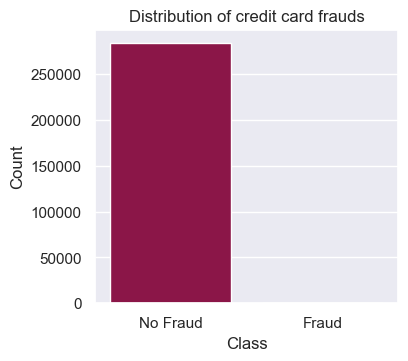

In [34]:
#Let's look at genuine to fraud transactions.  
ax = get_axes_list(1)[0]
sns.set_palette("PuRd_r")
bar = sns.countplot(x=crecard_df["Class"],ax=ax)
ax.set_xticklabels(['No Fraud', 'Fraud'])
ax.set_xlabel("Class")
ax.set_ylabel("Count")
bar.set_title('Distribution of credit card frauds')
plt.show()

In [35]:
# Let us begin sex variable
crecard_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

There are **284315 Genuine Transactions** to **492 Fraudulent Transactions** in our dataset. This that males are more than females in the dataset. We can visualise this on a count and catplots.

From all the quantitative and visual analysis, we obviously comprahend there is a huge disproportion in our data. Just **0.17%** represents fraud data.  

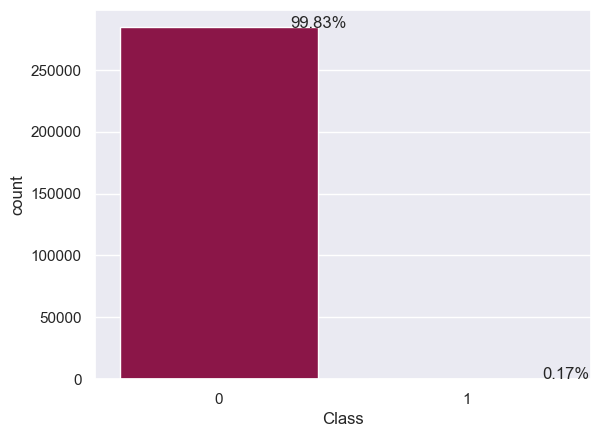

In [36]:
# Plot the proportion to the total
ax = sns.countplot(x='Class',data=crecard_df)
total = float(len(crecard_df))
for p in ax.patches:
    percentage="{:.2f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha="center")
plt.show()

From the plot above, **Genuine Transaction** has the highest ratio. 

In [37]:
################################################################################################################################

### Univariate Visualisation
#### Distribution of Credit Card Fraud
Before, let us visualise the distribution of Credit Card Fraud: 

Let us convert this proportion to percentage to ascertain clearly how many Genuine and fraudulent and the degree of imbalance in the dataset.  

In [38]:
print('Percentage of Genuine Transactions:', round(crecard_df['Class'].value_counts()[0]/len(crecard_df) * 100,2),
      '% of the dataset')
print('Percentage of Fraud Transactions:', round(crecard_df['Class'].value_counts()[1]/len(crecard_df) * 100,2),
      '% of the dataset')

Percentage of Genuine Transactions: 99.83 % of the dataset
Percentage of Fraud Transactions: 0.17 % of the dataset


We can observe that, out of the total of **284807 transactions**, **99.83% of the transactions are not classified as fraud** whereas only **0.17% are fraudulent**. 

Once again, it is eveident that our dataset is highly imbalanced. This means that at a blind guess there would be an accuracy of 99.8% of Genuine Transactions. 

#### Distribution of Amount
We will check the distribution of Amount. 

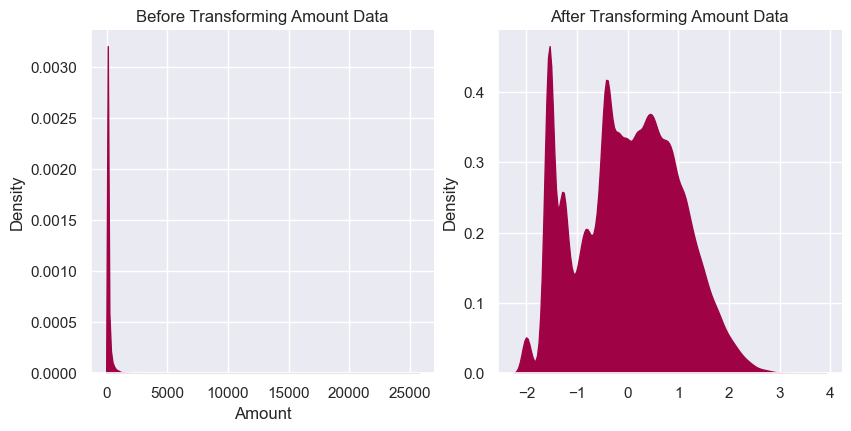

In [39]:
data_transformed = power_transform(crecard_df[["Amount"]])
axes = get_axes_list(2,2)
rel_plots = []
rel_plots.append(sns.kdeplot(x=crecard_df["Amount"], fill=True, alpha=1, ax=axes[0]))
rel_plots[0].set_title('Before Transforming Amount Data') 
rel_plots.append(sns.kdeplot(x=data_transformed.ravel(), fill=True, alpha=1, ax=axes[1]))
rel_plots[1].set_title('After Transforming Amount Data') 
sns.despine()
plt.show()

We can deduce that from the distribution curve that on the left that there was a lower amount of transactions made, hence, the lower fraud transaction. Therefore, there is a possibility of fraud if transactions are higher or huge. 

However, We can obviously perceive the distribution of amount in our dataset to be highly skewed. We can therefore do a statiscal transformation to render the data points evenly distributed as shown on the right.

In [40]:
crecard_df["Amount"] = data_transformed #Apply the transformation.

In [40]:
################################################################################################################################

#### Distribution by time

Let us investigate how our data points are distributred by time. 

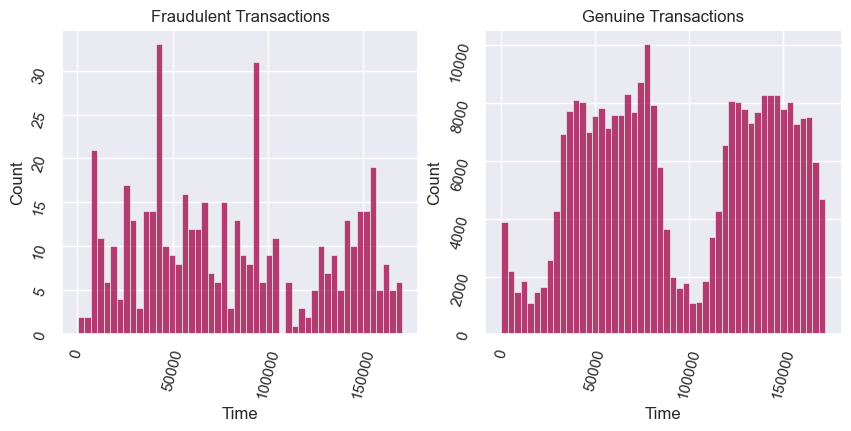

In [41]:
axes = get_axes_list(2,2)
trans_plots = []
trans_plots.append(sns.histplot(crecard_df["Time"][crecard_df.Class == 1], bins=50, ax=axes[0]))
trans_plots[0].set_title("Fraudulent Transactions")
trans_plots[0].tick_params(labelrotation=75)
trans_plots.append(sns.histplot(crecard_df["Time"][crecard_df.Class == 0], bins=50, ax=axes[1]))
trans_plots[1].set_title("Genuine Transactions")
trans_plots[1].tick_params(labelrotation=75)
plt.show()

There seems to be a lot of times that transactions were made. There could be frsud if transactions were carried out many times by a bredit card holder. However it also appears that althogh transactions were made many times, most of them were below 10,000.

We want to compare and check if there is a relationship between Time and Amount.

In [42]:
###############################################################################################################################

### Correlation 
Now we will explore relationships in our dataset. 

#### Correlation Matrix

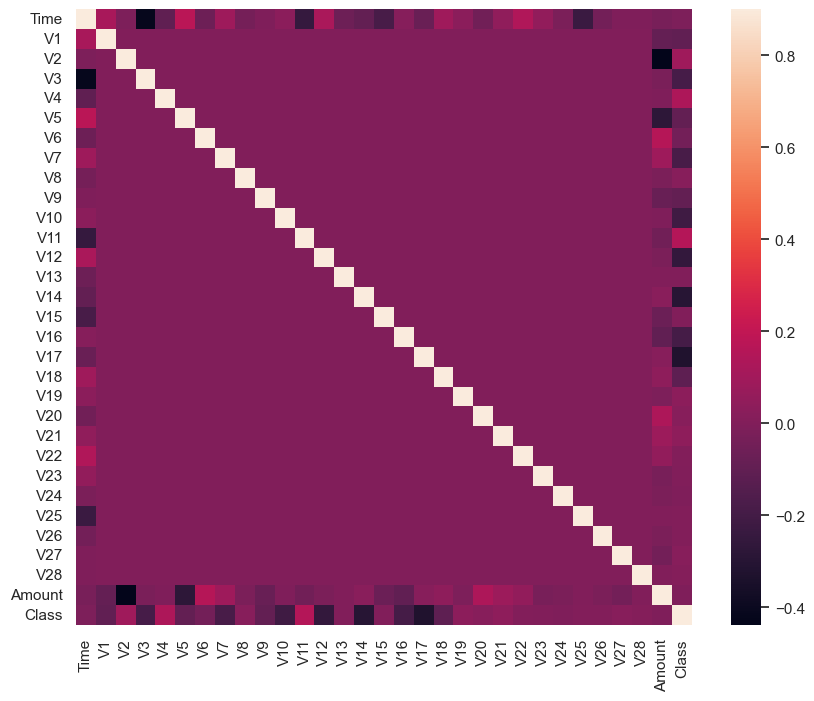

In [48]:
# Correlation Matrix
Cor_metrics = crecard_df.corr()
fig = plt.figure(figsize = (10, 8))
sns.heatmap(Cor_metrics, vmax = 0.9, square = True)
plt.show()

It difficult to the the correlation between each feature although the correlation meter beside point out this. This is as a result of transforming some features, V1, V2,....V28 into their principal components with PCA. Nonetheless, we can use Pandas .sort_values function to project these numerically. 

#### Correlation Analysis

In [49]:
# Print corr() for the features
crecard_df.corr()['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
Amount   -0.009650
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

In [50]:
# Let's sort corr() into max and min

# Sort the correlation values in ascending order and get the smallest value
min_corr = crecard_df.corr()['Class'].nsmallest(1)
print("Minimum correlation:", min_corr)

# Sort the correlation values in descending order and get the largest value
max_corr = crecard_df.corr()['Class'].nlargest(1)
print("\nMaximum correlation:", max_corr)


Minimum correlation: V17   -0.326481
Name: Class, dtype: float64

Maximum correlation: Class    1.0
Name: Class, dtype: float64


From the analysis, we now know the minimum correlation, **-0.326481 for V1 (unknown feature due to PCA)** and maximum **1.0 for Class**

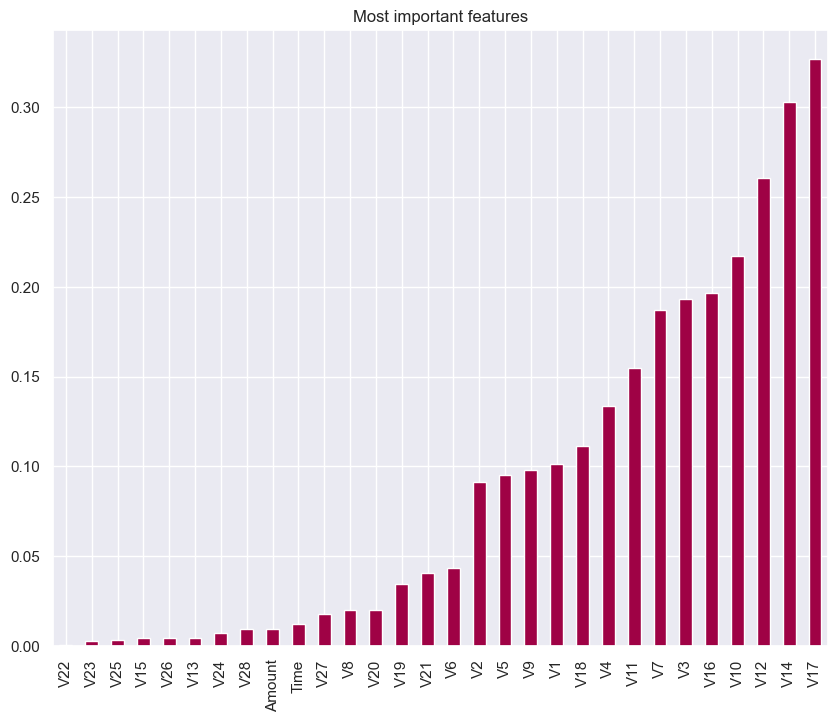

In [51]:
# Let's plot this. 
plt.figure(figsize=(10,8))
d = crecard_df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

In [52]:
# Let's highlight all features with correlation equal or greater than 0.15
# This will retturn a boolean 
crecard_corr = crecard_df.corr()['Class'][:-1].abs() > 0.15

print (crecard_corr)

Time      False
V1        False
V2        False
V3         True
V4        False
V5        False
V6        False
V7         True
V8        False
V9        False
V10        True
V11        True
V12        True
V13       False
V14        True
V15       False
V16        True
V17        True
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Name: Class, dtype: bool


V3, V7, V10, V11, V12, V14, V16 and V17 have correlation greater than 0.15 wheras the other features have less. Let's investigate why these have higher correlation. 

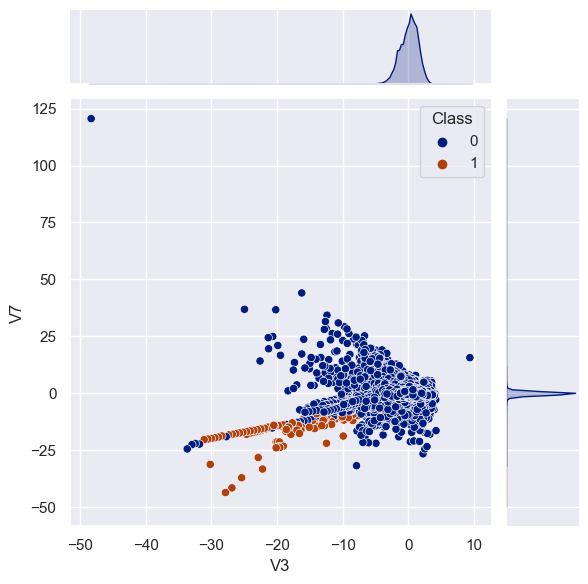

In [53]:
# We can view their correlations against each other. 
sns.jointplot(x='V3', y='V7',hue='Class', data=crecard_df, palette = 'dark')

The dist plot above the scatter plot shows the distribution of the variables of V3 0n the x-axis whereas the one on the right shows the distribution of V7 variables on the y-axis. 

The scatter plot shows the correlation of V3 and V7. We can observe that, an increase in V3 results idoes not signifcantly affect V7. Hence, fraud is unlikely to be commiited. 

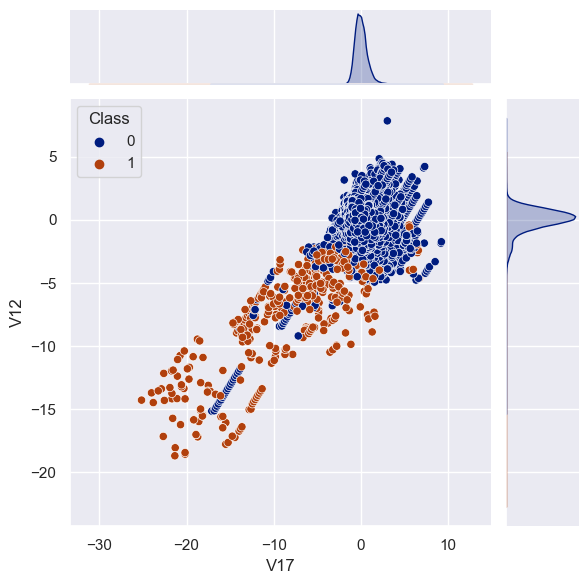

In [54]:
sns.jointplot(x='V17', y='V12',hue='Class', data=crecard_df, palette = 'dark')

There is a significant correlation between V17 and V12. A higher value of V17 is likely to cause V12 to also increase that will impact the cause of fraud. However, less fraud is likely to happen since all fraud data points are below 0. We could also see that most of the data points in V12 are skewed to the right. This could be the work of outliers.V17 have normal disbrution.   

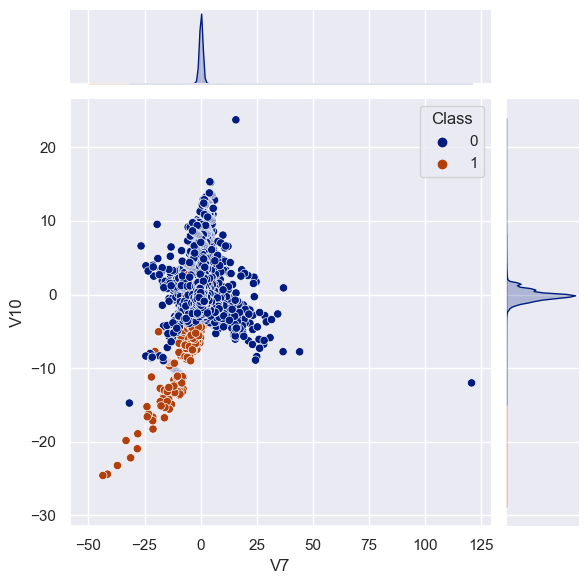

In [55]:
sns.jointplot(x='V7', y='V10',hue='Class', data=crecard_df, palette = 'dark')

There is a significant correlation between V7 and V10. A higher value of V17 is liely to cause V12 to also increase that will impact the cause of fraud. However, less fraud is likely to happen as all fraud instances are less than 0. We could also see that most of the data points in V10's data points are skewed to the left. This could be the work of outliers too. V7 has even distribution.

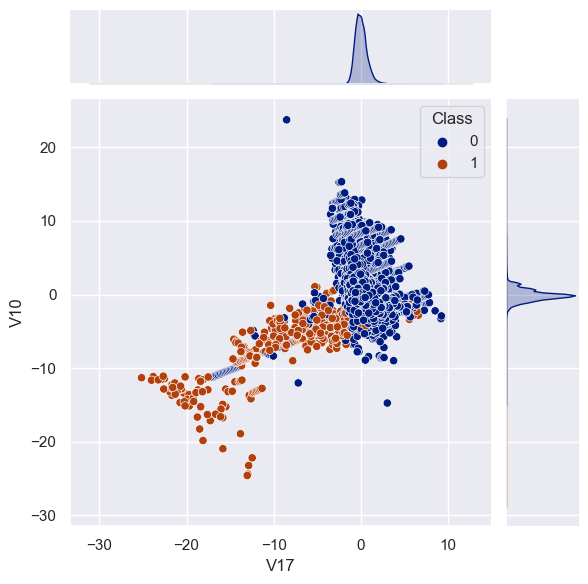

In [56]:
sns.jointplot(x='V17', y='V10',hue='Class', data=crecard_df, palette = 'dark')

A few of the fraud data are above here. This means there is tendency of fraud occurring when V17 increases and V10 also increases. As already analysed, V10 has skewed data points signifying the presence of outliers. 

The **ipyml module** helps us to clearly see this correlation when the the mouse pointer is hovered over the points. The **widget** **(commented out when loding the libraies)** from the module displays the results beneath the plot. 

For example:
* at x = -5.4, y = 1.1. This means fraud is likely to happen.
* at x = -4.2, y = 0.4. This means fraud is likely to happen.
* at x = -3.2, y = 0.9. This means fraud is likely to happen.

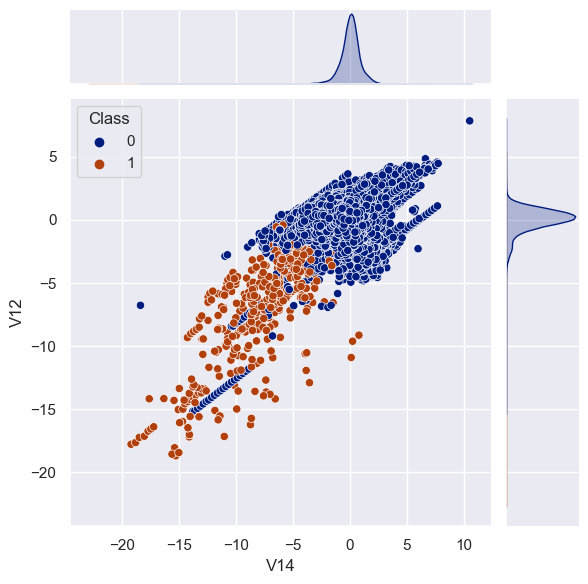

In [57]:
sns.jointplot(x='V14', y='V12',hue='Class', data=crecard_df, palette = 'dark')


Once again, outliers are presence here. This time the outliers were seen within the data points in V12 that are skewed to the right. V14 as stable or even distribution. All fraud data points are below zero justifying frau is unlikely to occur here.

Although **Time** and **Amount** were all below 0.15 correlation, we are curious about their influence on causing fraud. Therefore, we will investigate to clear our doubts.  

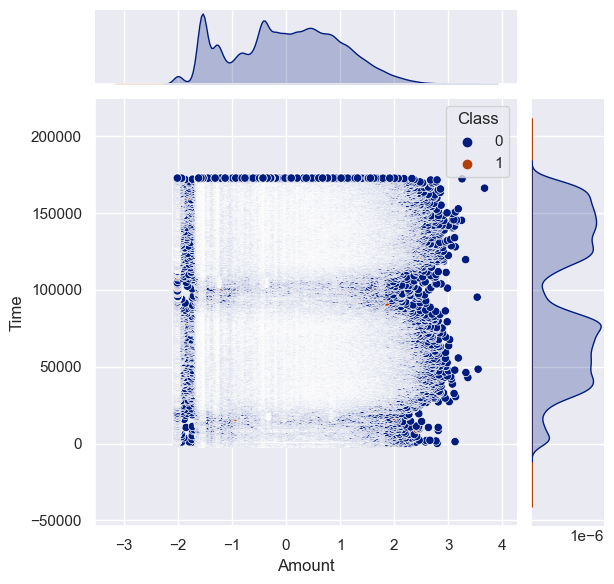

In [58]:
# Let's begin with finding the corelation between Time and Amount 
sns.jointplot(x='Amount', y='Time',hue='Class', data=crecard_df, palette = 'dark')

No enough information here about the presence of fraud but since the transactions are many, there is a posibility of outliers in our data. Unconventionally, outliers in our data can help use detect fraud transactions since they are anomalies. The higher the amount of transaction and the longer the time, there is a risk of fraud transaction.


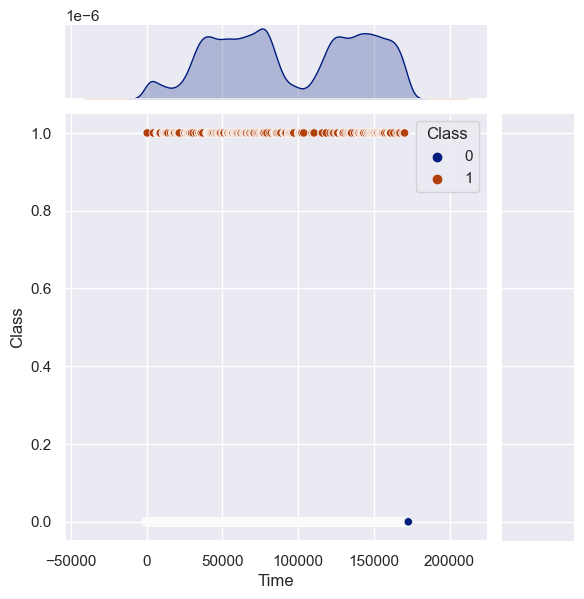

In [59]:
# Let's find the corelation between Time and Class 
sns.jointplot(x='Time', y='Class',hue='Class', data=crecard_df, palette = 'dark')

There seems to be a corelation between time and Class (Fraud). This means an increase in time is likely to cuase fraud. The implication is that, the longer a transaction takes, the likelihood of fraud occuring. 

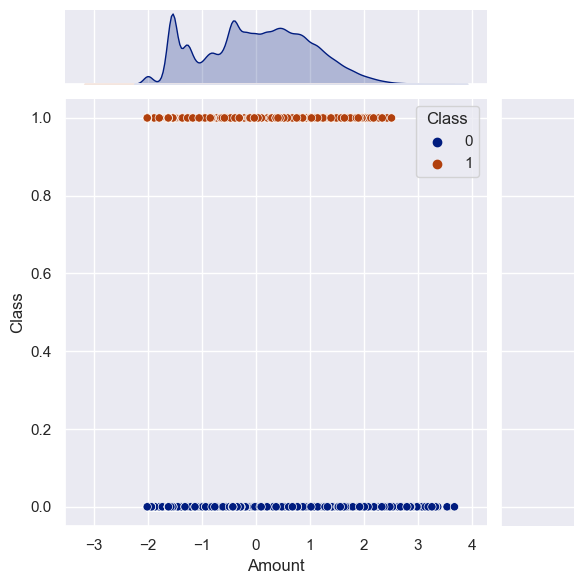

In [60]:
# Let's check the corelation between Amount and Class
sns.jointplot(x='Amount', y='Class',hue='Class', data=crecard_df, palette = 'dark')


Again, there seems to be a corelation between **Amount** and **Class (Fraud)**. This means an increase in amount is likely to cuase fraud. The implication is that, the higher the transaction, the likelihood of fraud occuring.

Our analysis revealed some instances of outliers in some of the festures. We will go further to investigate this to ascertain the proportion of outliers in our dataset. This can be regarded as a feature engineering task

In [95]:
################################################################################################################################

# Feature Engineering 

## Investigation of Outliers
There could be outliers as there was many more times that transactions were made and we also observed that most transactions were lesser but few were huge amount which are regarded as anomalies. These are outliers in the transactions. 

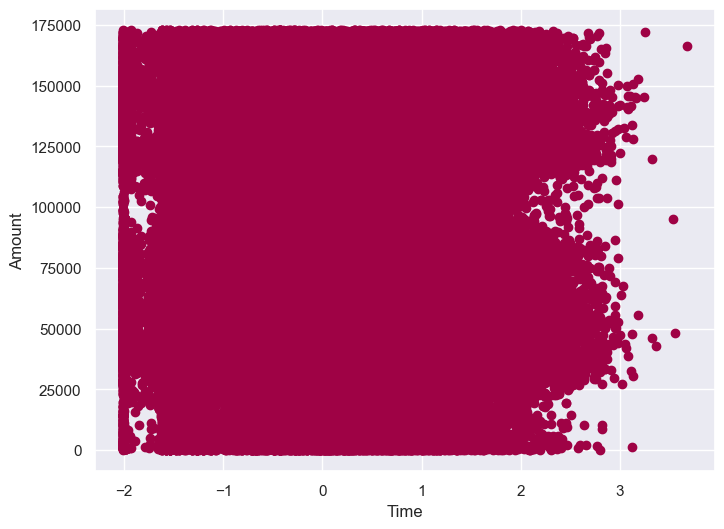

In [64]:
# Plot outliers 
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(crecard_df['Amount'], crecard_df['Time'])
ax.set_xlabel('Time')
ax.set_ylabel('Amount')
plt.show()

Since the transactions are many, there is a posibility of outliers in our data. Unconventionally, outliers in our data can help use detect fraud transactions since they are anomalies. The higher the amount of transaction and the longer the time, there is a risk of fraud transaction.

### Detection of Outliers

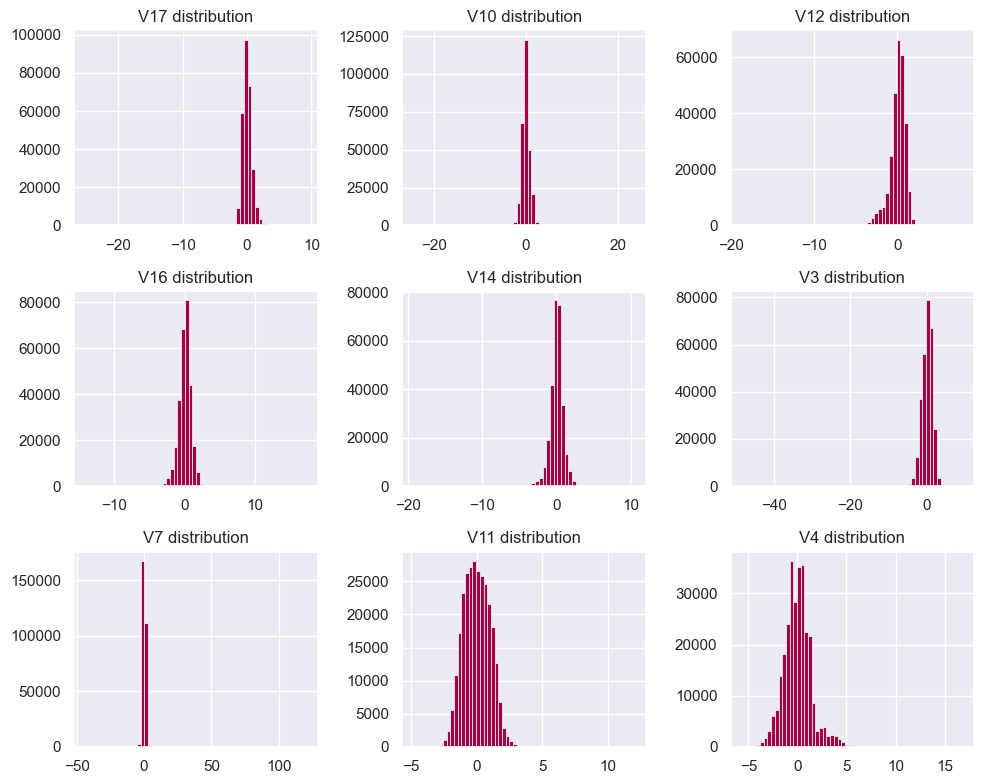

In [65]:
# Plot ouliers with histgram
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(10,8))

axes[0,0].hist(crecard_df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(crecard_df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(crecard_df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(crecard_df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(crecard_df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(crecard_df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(crecard_df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(crecard_df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(crecard_df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

### Plotting Outliers

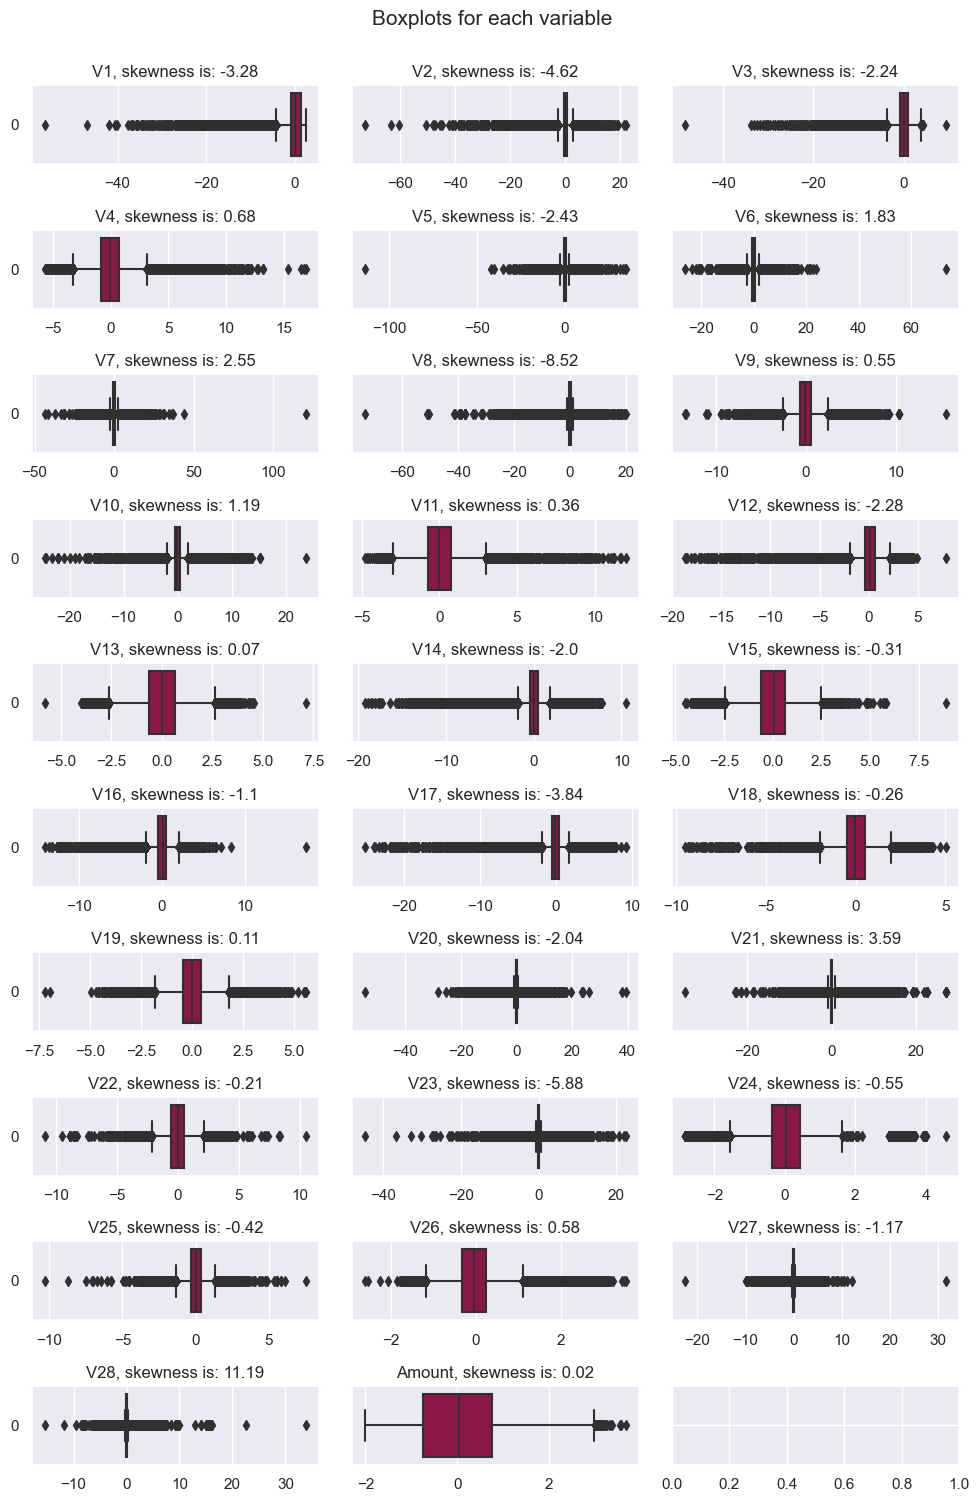

In [66]:
# Let's use boxplot to view the outliers
num_col = (list(crecard_df.loc[:, 'V1':'Amount']))

def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(10,15))
    fig.suptitle(suptitle,y=1, size=15)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=crecard_df, columns_list=num_col, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

## Statistical Analysis of Outliers

The various historgrams represents the distribtuions of all features with correlation equal or greater than 0.13. Our checks confirms that there are a lot of outliers. 

How should we treat our outliers? Should we droup them? Before we take any decision, let's investigate the total number of outliers. We can do this by employing **Tukey's Interquartile Range (IQR)**. **Tukey (1977) opines that, anything not in the range of Q1-1.5R and Q3 + 1.5 IQR is an outlier**, and can be removed. 

His tecknique is used to detect outliers in univariate distribution for symmetric as well in a slightly skewed dataset. 

Notwithstanding, the higher presence of outliers we will not delete or remove them. This is because every dataset is different and as much as fraud detection is concerned, outliers can help us solve some business questions like does transacting huge amount being an anomaly be a red flag for fraud? 

Moreover, as our dataset is not balanced, removing these outliers might compromise the performance of some models. Also, the problem of imbalanced in our dataset still exist. We can demonstrate this below.

In [67]:
def outlier_total (crecard_df,n,features):
    crecard_df = pd.read_csv('creditcard.csv')
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(crecard_df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(crecard_df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = crecard_df[(crecard_df[column] < Q1 - outlier_step) | (crecard_df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    mult_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = crecard_df[crecard_df[column] < Q1 - outlier_step]
    out2 = crecard_df[crecard_df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return mult_outliers

In [68]:
# detecting outliers
Outliers_IQR = outlier_total(crecard_df, 1, num_col)


# dropping outliers
outliers_df = crecard_df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 31904


There are **31904 outliers** from our analysis that were detected and subsequently deleted. 

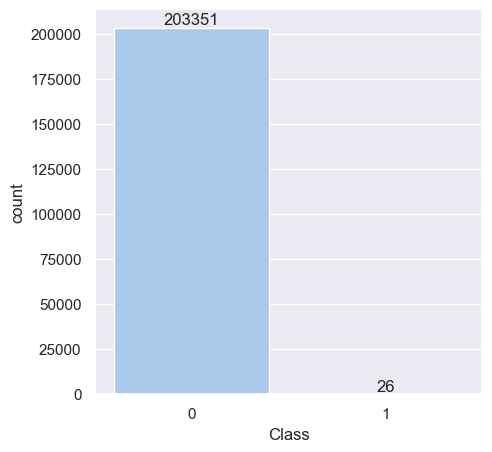

In [69]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Class',data=outliers_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

Almost all the fraud transactions have been deleted from our dataset. Out of the 492 fraud transactions, we only have 26 left after deleting the outliers. Wrangling the current data trying to solve this will take us back to the point we we dropped the ouliers. 

In [ ]:
################################################################################################################################

# Model Preprocessing

As indicated above, we have an imbalanced dataset which is aleady baised to a good accuracy score. We have **99.8%** of Genuine transactions to only **0.173** of fraud transactions. This means that even before building any model, we are garanteed of an accuracy score of 99.8%. Hence, we cannot rely on accuracy score a metric to measure the performance of the models with imbalanced dataset. Due to this we will do a data preprocessing before building the models. 

## Duplicate Values
### Dropping Duplicates

In [4]:
# Drop duplicates

# First make a copy of the dataset 
df = crecard_df.copy()

# Check the totals number of rows in the original dataframe
original_row = len(df)

# drop duplicates
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 79)

# Total rows after dropping duplicates
dropped_rows = original_row - len(df)

# Print the number of duplicate rows dropped
print(f"Dropped {dropped_rows} rows")

Duplicated values dropped succesfully
*******************************************************************************
Dropped 1081 rows


In [72]:
df.shape

(283726, 31)

## Train Test Split

To begin with our modelling, we need to first split our dataset into train and test data. However, we will use stratified splitting to avoid data leakage. 

**80% train** - 80% of the data will be used to train the model.

**20% test** - the remaining 20% will be used to **validate** our model. 

### Stratified Splitting

We want to keep the same proportions of classes in each split. Using random splitting might render the proportions of the target variable among the different splits to diifer. For this reason, we chose to use stratified spltting here. 

In [5]:
#Split the dataset
X = df.drop("Class", axis=1)
y=df["Class"].values
rand_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=rand_state, stratify=y)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226980, 30)
(56746, 30)
(226980,)
(56746,)


### Feature Scaling 

In [6]:
# Scale the data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Results DataFrame
results = pd.DataFrame(columns=["Function Name", "Accuracy", "Precision", "Recall", "F1",
                            "TN", "FP", "FN", "TP", "ROC-AUC Score", "Precision-Recall Score", "Train CV Score"])
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=rand_state) # due to imbalanced dataset, we will use stratified. 
kfold_for_test = StratifiedKFold(n_splits=6, shuffle=True, random_state=0) # same is for testing different cross validations

In [ ]:
###############################################################################

### Pre-Model Tunninng
We need to tune our model before hand. 

In [76]:
# Tuning LogisticRegression.
def tune_logreg(X=X_train_scaled, y=y_train, scoring="average_precision", cv=kfold):
    log_regparams = {"solver": ["liblinear"],
                      #"penalty": ['l1', "l2"],
                      'C': [0.001, 0.01, 0.1, 1, 10, 100],
                      "class_weight": [{0:1, 1:w} for w in list(range(1,100,40))]}
    grid_logreg = RandomizedSearchCV(LogisticRegression(max_iter=100000,n_jobs=-1),
                                      log_regparams, cv=kfold, n_iter=2, n_jobs=-1, scoring=scoring, verbose=1)
    grid_logreg.fit(X, y)
    return grid_logreg.best_estimator_

In [77]:
# Tunning K-Nearest Neighbor.
def tune_knn(X=X_train_scaled, y=y_train, scoring="average_precision", cv=kfold):
    knn_params = {"n_neighbors": list(range(2,5,1)), 
                    'metric' : ['minkowski','euclidean','manhattan'],
                    "weights": ["uniform", "distance"]}
    grid_knn = RandomizedSearchCV(KNeighborsClassifier(n_jobs=-1), knn_params, cv=kfold, n_iter=20, scoring=scoring, verbose=1)
    grid_knn.fit(X, y)
    return grid_knn.best_estimator_

In [78]:
# Tunning decision tree classifier 
def tune_dtree(X=X_train_scaled, y=y_train, scoring="average_precision", cv=kfold):
    tree_params = {"criterion": ["gini", "entropy"],
                "max_depth": list(range(2,5,1)),
                "min_samples_leaf": list(range(5,7,1)), 
                "class_weight": [{0:1, 1:w} for w in list(range(1,100,20))]}
    grid_tree = RandomizedSearchCV(DecisionTreeClassifier(),
                                    tree_params, cv=kfold, n_iter=7, n_jobs=-1,scoring=scoring, verbose=1)
    grid_tree.fit(X, y)
    return grid_tree.best_estimator_

In [79]:
# Tunning Xgboost classifier
def tune_xgb(X=X_train_scaled,y=y_train, scoring="average_precision", cv=kfold):
    xgb_params = {"colsample_bytree": uniform(0.7, 0.1),
            "gamma": uniform(0, 0.5),
            "learning_rate": uniform(0.03, 0.5),
            "max_depth": randint(2, 25),
            "n_estimators": randint(100, 250),
            "subsample": uniform(0.7, 0.3),
            "max_delta_step": randint(1,10) }
    grid_xgb = RandomizedSearchCV(xgb.XGBClassifier(objective="binary:logistic",eval_metric=average_precision_score ,n_jobs=-1, tree_method="hist", random_state=rand_state),
                                xgb_params, cv=kfold, n_iter=20, scoring=scoring)
    grid_xgb.fit(X, y)
    return grid_xgb.best_estimator_

In [80]:
# Tunning Stochastic Gradient Descent (SGD)
def tune_sgd_bayes(X=X_train_scaled, y=y_train, scoring="average_precision",cv=kfold):
    def objective_for_minimization(search_space, X=X, y=y, scoring_objective=scoring):
        model = SGDClassifier(**search_space, max_iter=int(1e9), n_jobs=-1, random_state=rand_state)
        best_score = cross_val_score(model, X, y, scoring=scoring_objective, cv=kfold, n_jobs=-1).mean()
        loss = 1 - best_score
        return {'loss': loss, 'status': STATUS_OK}
    
    search_space = {"penalty" : hp.choice("penalty", ['l1', 'l2', 'elasticnet']),
                    "alpha" : hp.uniform("alpha",0.00001, 3),
                    "learning_rate" : hp.choice("learning_rate",['constant', 'optimal', 'invscaling', 'adaptive']), 
                    'eta0':hp.uniform('n_estimators',0,3),
                    "power_t": hp.uniform('power_t',-0.1,1),
                    "validation_fraction": hp.uniform('validation_fraction',0.1,0.3),
                    'loss':hp.choice("loss",['modified_huber']),
                    'class_weight': {0:1, 1:scope.int(hp.uniform('class_weight', 1, 100))}
                }
    # here, we will implement Hyperopt
    algorithm = tpe.suggest
    best_params = fmin(fn=objective_for_minimization,
                    space=search_space,
                    algo=algorithm,
                    max_evals=40)
    fun_params_dict=space_eval(search_space, best_params)
    return SGDClassifier(**fun_params_dict, n_jobs=-1)

In [ ]:
################################################################################################################################

### Cross validation. 
The best way to cross validate our data is during cross-validation. This is done so that our training data will not be contaminated or compromised with the sampled data.

The best model is the one that make better predictions on the unseen or new data avoids overfitting and/or underfitting but not the one that gives accurate predictions on the training set. Hence, the need for cross validation. Cross validation can be referred to as a resampling method employed to evaluate a mchine learning model on a limited sampled data. This method has a single parameter known as K that refers to the number of groups that a given sample data is splitted into. This method can also be regarded as K-fold cross vlidation. 

Its main purpose is to test whether a machine learning model is capable of make a good prediction on new data. 

In [81]:
def cross_val(model, X_train, y_train, cv=kfold_for_test, 
                                results=results, undersample=False, 
                                oversample=False, stack=False, other=False):  
    scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']
    scores_dict = {metric: [] for metric in scoring_metrics}
    sampling_methods = {'undersample': NearMiss(sampling_strategy='majority', n_jobs=-1, version=3),
                        'oversample': ADASYN(random_state=rand_state)}
    sample_pipeline = make_pipeline(model)
    if undersample:
        sample_pipeline.steps.insert(0, ('undersample', sampling_methods['undersample']))
    if oversample:
        sample_pipeline.steps.insert(0, ('oversample', sampling_methods['oversample']))
    for train_idx, test_idx in cv.split(X_train, y_train):
        sample_model = sample_pipeline.fit(X_train[train_idx], y_train[train_idx])
        sample_prediction_proba = sample_model.predict_proba(X_train[test_idx])[:,1]
        sample_prediction = np.round(sample_prediction_proba)
        scores_dict["accuracy"].append(accuracy_score(y_train[test_idx], sample_prediction))
        scores_dict["precision"].append(precision_score(y_train[test_idx], sample_prediction))
        scores_dict["recall"].append(recall_score(y_train[test_idx], sample_prediction))
        scores_dict["f1"].append(f1_score(y_train[test_idx], sample_prediction))
        scores_dict["roc_auc"].append(roc_auc_score(y_train[test_idx], sample_prediction_proba))
        scores_dict["average_precision"].append(average_precision_score(y_train[test_idx], sample_prediction_proba))
    return  scores_dict

In [82]:
def get_scoring_name(scoring):
    equal = {"accuracy": "Accuracy", 
             "precision": "Precision", 
             "recall": "Recall", 
             "f1": "F1", 
             "roc_auc": "ROC AUC", 
             "average_precision": "AP AUC"} 
    return equal[scoring]

In [83]:
def get_training_cross_validated_score(model, X_train, y_train, undersample=False, oversample=False, stack=False, other=False, scoring="Accuracy"):
    try:
        if undersample or oversample or stack:
            training_cross_validated_score = np.mean(
                cross_val_score_for_sampling(
                    model, X_train, y_train, undersample=undersample, oversample=oversample, stack=stack, other=other)[scoring])
        elif other:
            return None
        else:
            training_cross_validated_score = cross_val_score(
                model, X_train, y=y_train, cv=kfold, scoring=scoring, n_jobs=-1).mean()
        return training_cross_validated_score
    except Exception as e:
        return None

In [84]:
def print_scores(models, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train, 
                y_test=y_test, result_prefix="",results=results, undersample=False, 
                oversample=False, stack=False, other=False, scoring="average_precision"):
    ax_list =get_axes_list(len(models))
    ax_counter = 0
    for i, (name, model) in enumerate(models.items()):
        model_name = model.__class__.__name__
        ax_of_model = ax_list[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred = np.round(y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        if hasattr(model, "predict_proba"):
            predicted_prob = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, predicted_prob)
            average_precision = average_precision_score(y_test, predicted_prob)
        else:
            predicted_prob = None
            roc_auc = None
            average_precision = None
        training_cross_validated_score = get_training_cross_validated_score(
            model, X_train, y_train, undersample=undersample, oversample=oversample, stack=stack, other=other, scoring=scoring)
        scoring_name = get_scoring_name(scoring)
        scoring_variable = locals()[scoring]
        if training_cross_validated_score and scoring_variable:
            ax_of_model.set_title(f"{model_name} \n ({scoring_name}: {scoring_variable:3.2f} || Train {scoring_name}: {scoring_variable:3.2f})",
                                fontdict={'fontsize':10})
        elif scoring_variable:
            ax_of_model.set_title(f"{model_name} \n ({scoring_name} score: {scoring_variable:3.2f})")
        else:
            ax_of_model.set_title(f"{model_name}")
        function_name = f"{model_name}{result_prefix}"    
        function_location = results[results["Function Name"] == function_name].index
        index_to_insert=(len(results.index) if function_location.empty else function_location[0])
        results.loc[index_to_insert] = [function_name, accuracy,
                                        precision, recall, f1, tn, fp, fn, tp, roc_auc, 
                                        average_precision, training_cross_validated_score] 
        labels_ = ['No Fraud', 'Fraud']
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels_, 
                                                ax=ax_of_model, cmap='Blues', xticks_rotation="vertical")
        #print(classification_report(y_test, y_pred)) #If you want to get classification report.
    plt.show()

In [ ]:
################################################################################################################################

# Model Building. 
We will begin with default parameters.

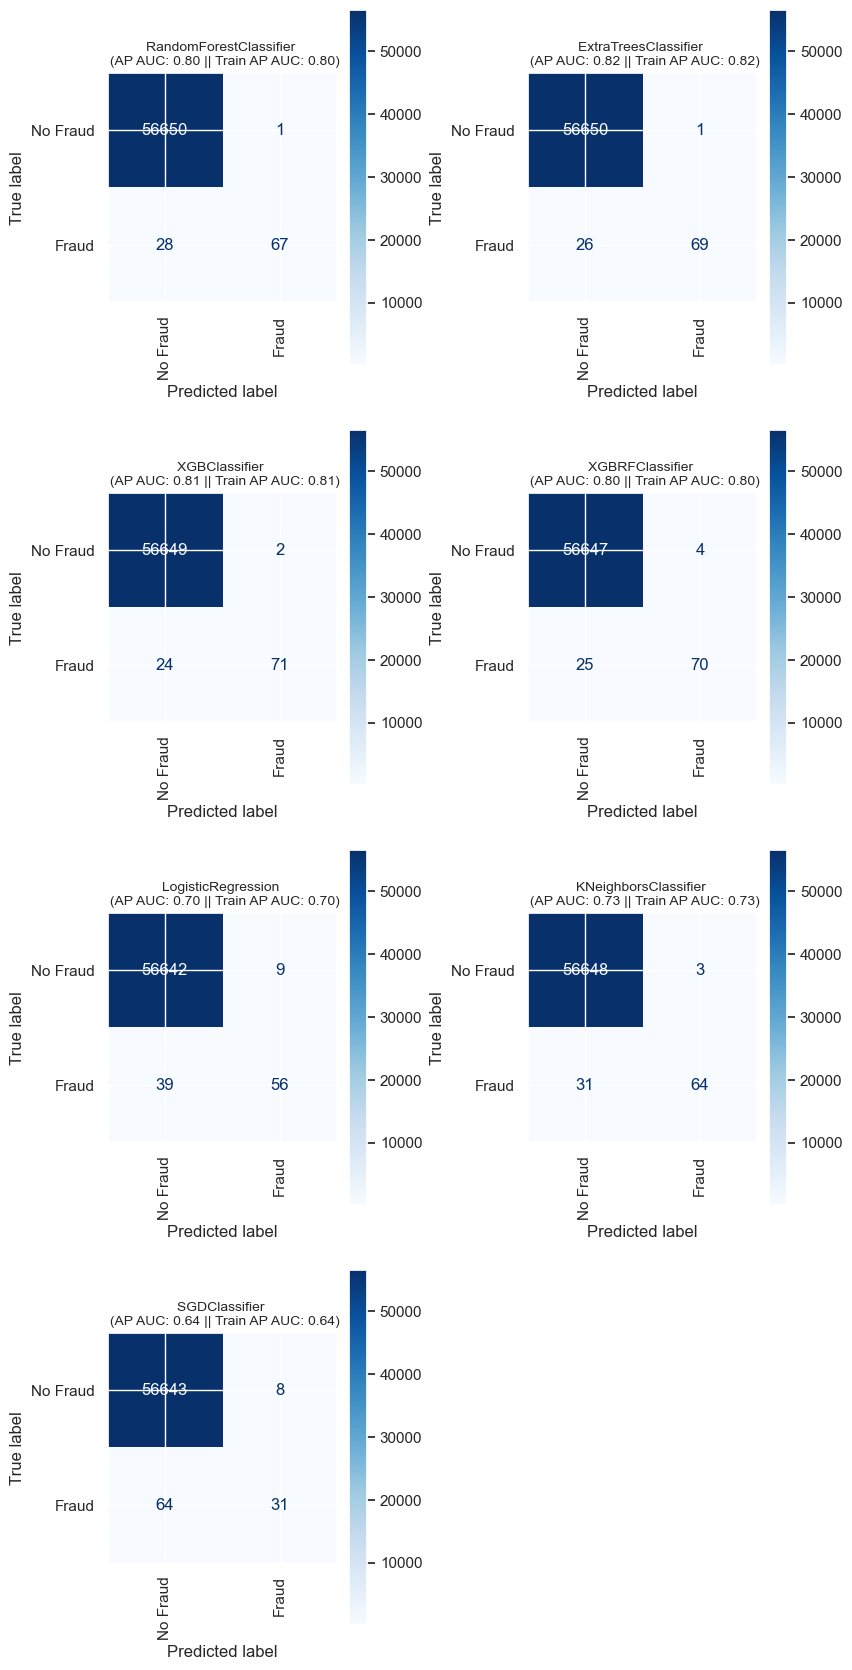

In [85]:
models = {"Random Forest":RandomForestClassifier(n_jobs=-1, random_state=rand_state),
          "Extra":ExtraTreesClassifier(n_jobs=-1),
          "XGB Classifier": xgb.XGBClassifier(eval_metric=average_precision_score, n_jobs=-1, 
                                              tree_method="hist", random_state=rand_state),
          "XGB Random Forest Classifier": xgb.XGBRFClassifier(objective="binary:logistic", eval_metric=average_precision_score, 
                                                              tree_method="hist", random_state=rand_state),
          "Logistic Regression": LogisticRegression(n_jobs=-1),
          "KNN": KNeighborsClassifier(n_jobs=-1), 
          "SGD": SGDClassifier(n_jobs=-1, loss="log")}
print_scores(models)

In [ ]:
################################################################################################################################

## Statistcal Explanatory Analysis (SEA)

In [86]:
# Let's print out the metric scores for each model for evaluation

# evaluate each model
for name, model in models.items():
    # make predictions on test data
    y_pred = model.predict(X_test)
    # print classification report
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    # print ROC-AUC score
    y_proba = model.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_proba[:, 1])
    print(f"ROC-AUC score: {auc:.4f}\n")


Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.66      0.76        95

    accuracy                           1.00     56746
   macro avg       0.94      0.83      0.88     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC score: 0.9209

Model: Extra
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.74      0.81        95

    accuracy                           1.00     56746
   macro avg       0.95      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC score: 0.9398

Model: XGB Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.75      0.81        95

    accuracy                           1.00     56746
   macro avg       0.94   

## Comparison of Model Performance

In [87]:
# calculate accuracy, ROC-AUC, precision, recall values for each model
accuracies = {}
roc_aucs = {}
precisions = {}
recalls = {}
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    precisions[name] = precision
    recalls[name] = recall
    accuracies[name] = acc
    roc_aucs[name] = roc_auc

# print accuracy, ROC-AUC, precision, and recall scores for each model
for name in models:
    print(f'{name}:')
    print(f'Accuracy: {accuracies[name]:.3f}')
    print(f'ROC-AUC Score: {roc_aucs[name]:.3f}')
    print(f'Precision Score: {precisions[name][1]:.3f}')
    print(f'Recall Score: {recalls[name][1]:.3f}\n')


Random Forest:
Accuracy: 0.999
ROC-AUC Score: 0.921
Precision Score: 0.002
Recall Score: 1.000

Extra:
Accuracy: 0.999
ROC-AUC Score: 0.940
Precision Score: 0.010
Recall Score: 0.905

XGB Classifier:
Accuracy: 0.999
ROC-AUC Score: 0.962
Precision Score: 0.002
Recall Score: 1.000

XGB Random Forest Classifier:
Accuracy: 0.999
ROC-AUC Score: 0.965
Precision Score: 0.002
Recall Score: 1.000

Logistic Regression:
Accuracy: 0.998
ROC-AUC Score: 0.497
Precision Score: 0.001
Recall Score: 0.011

KNN:
Accuracy: 0.998
ROC-AUC Score: 0.505
Precision Score: 1.000
Recall Score: 0.011

SGD:
Accuracy: 0.003
ROC-AUC Score: 0.501
Precision Score: 0.002
Recall Score: 1.000



In [ ]:
################################################################################################################################

## Feature Importance
Although we have majority of our features transformed due to PCA, we can still investigate the important features in our model and their contributions for making prediction. This investigation will also reveal which feature(s) has the most influence on our target variable. 

Furthermore, looking into feature importance can assist us undercover which variables are key indicators in predicting fraudulent transactions or behaviour. 

We would use the following to determine the important feature:
* The Permutation feature importance from the Random Forest Classifier by randomly shuffling the values of each featureand also measure the outcome as they decrease in the performance of the model. 

* The Reduction in impurity achieved by each feature in the Decision Tree model

Feature Importance
V10              13.350232
V12              11.286404
V14              11.052589
V17               7.661039
V16               6.752440
V11               5.342272
V7                5.018379
V9                3.674706
V4                3.399462
V3                3.330787
V21               2.579072
V26               2.233214
V18               2.085956
V5                1.724585
V1                1.496995
Amount            1.477090
Time              1.428613
V13               1.373595
V27               1.372505
V6                1.365982
V20               1.345815
V22               1.328692
V19               1.305094
V28               1.241631
V15               1.237639
V24               1.227922
V25               1.186105
V8                1.172416
V2                1.114353
V23               0.834413

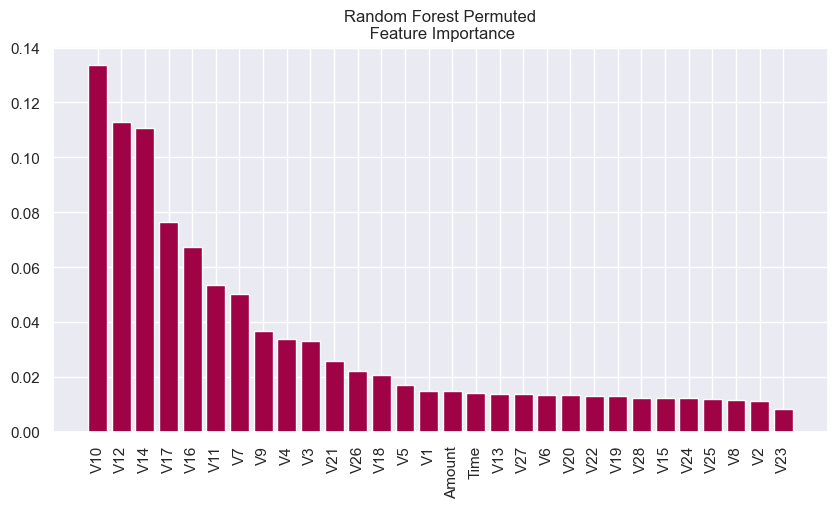

In [94]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=rand_state)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame(importances*100, index = X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
display(feature_importances)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10,5))
plt.title("Random Forest Permuted\n Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()


From the above plot, we can observe that V10 is the most impotant feature and V23 is the least. Unfortunately they are in PCA form and we can make much analysis on them. However if we are comparing only Time and Amount, we can deduce from the plot that Time is most important in predicting fraud than Amount. Notwithstanding, Amount is relatively important when it comes to predicitng fraudlent transaction. 

This means that, the how long a transaction takes and how small or huge an amount is transacted all can potentially determine whether or not a transaction is fraud.   

Feature Importance
V17              54.195933
V14               9.195052
V10               9.154819
V26               4.297092
V6                2.141526
V4                1.905444
V21               1.876975
V16               1.775761
V1                1.622272
V20               1.550813
V5                1.356325
V24               1.309489
V27               1.276635
V12               1.144759
Amount            1.084583
V11               0.940411
V19               0.803984
Time              0.711112
V28               0.677964
V7                0.532050
V15               0.520160
V22               0.515517
V3                0.397378
V23               0.264990
V18               0.264810
V9                0.242909
V25               0.241236
V13               0.000000
V8                0.000000
V2                0.000000

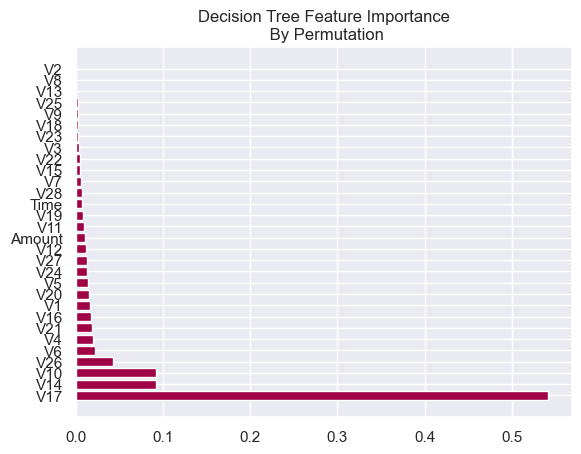

In [95]:
# Creating and train a decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Getting the feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame(importances*100, index = X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
display(feature_importances)


# Sorting feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearranging feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create the plot
plt.figure()

# The plot title
plt.title("Decision Tree Feature Importance\n By Permutation")

# Adding bars
plt.barh(range(X_train.shape[1]), importances[indices])

# Adding feature names as x-axis labels
plt.yticks(range(X_train.shape[1]), names)

# Show plot
plt.show()


In this method, **V17** had contributed most to prediciting Fraud wheras **V13**, **V8** and **V2** made no conrubution at all. Comparing to the feature importance of Random Forest, **V10** was the next most important feature in the prediction. This difference is as a results of each using different measures to rank the features. Whilst Random Forest randomly shuffles the values of each feature and measures the resulting decrease in the model, Decision Tree considers the number of times a feature was picked to split the data and also how a feature achieved reduction in impurity.

Inspite of these difference, both achieved the same accuracy of **0.999**. However,  Random forest had a ROC-AUC score of **0.930** and **0.940** for Decision Tree. We can deduced that The **V17** feature is a better feature in predictions than **V10**, hence, achieving a better performance using ROC-AUC metric for Decision Tree.  

### Statistical Testing
We can further do a hypotthesis testing to determine if there is a significant difference between the performance of **Random Forest** and **Decision Tree** classifiers. Here, we will do **a two-sample t-test** to compare the performance of the afforementioned models this time using their F1 score as a metric.   

In [96]:
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_ind

# Definng two models to compare
model_1 = RandomForestClassifier(n_jobs=-1, random_state=rand_state)
model_2 = ExtraTreesClassifier(n_jobs=-1)

# Defining scoring metric
scoring_metric = 'f1'

# Calculating cross-validation scores for each model
model_1_scores = cross_val_score(model_1, X_train, y_train, cv=kfold, scoring=scoring_metric)
model_2_scores = cross_val_score(model_2, X_train, y_train, cv=kfold, scoring=scoring_metric)

# Calculating mean and standard deviation of each model's scores
model_1_mean, model_1_std = model_1_scores.mean(), model_1_scores.std()
model_2_mean, model_2_std = model_2_scores.mean(), model_2_scores.std()

# Calculating t-statistic and p-value for the two models
t_stat, p_val = ttest_ind(model_1_scores, model_2_scores)

# Print out the mean scores, t-statistic, and p-value for the two models
print('Model 1 mean score: {:.3f} (std: {:.3f})'.format(model_1_mean, model_1_std))
print('Model 2 mean score: {:.3f} (std: {:.3f})'.format(model_2_mean, model_2_std))
print('T-Statistic: {:.3f}, p-value: {:.3f}'.format(t_stat, p_val))


Model 1 mean score: 0.815 (std: 0.051)
Model 2 mean score: 0.848 (std: 0.043)
T-Statistic: -0.993, p-value: 0.350


Our results show that **Decision (Extra) Trees Classifier** as **model 2**, has a higher mean F1 score of **0.848** compared to **0.815** for **model 1**, which is **Random Forest Classifier**. 

The t-test returned a result of **t-statistic** of **-0.993** an a **p-value** of **0.350**. The resulted negative **t-statistic** demonstrate that **model 1** performed worse than **model 2** on the average. 

The p-value shows the probability of obtaining such a result or even more extreme results happened by chance. Our **p-value, 0.350** is greater than the typical significant level of 0.05, indicating that the observed difference in the mean F1 score between the models could be by chance. Hence, we can not boldly conclude that **model 2** significantly performed better than **model 1** based on our dataset. 

Nonetheless, we can superficially take a stance that, **model 2** performed better than **model 1** per the given results. 

**NB:** Results keep variating each time the code is run. 

## Plotting Model Performance With AUC 

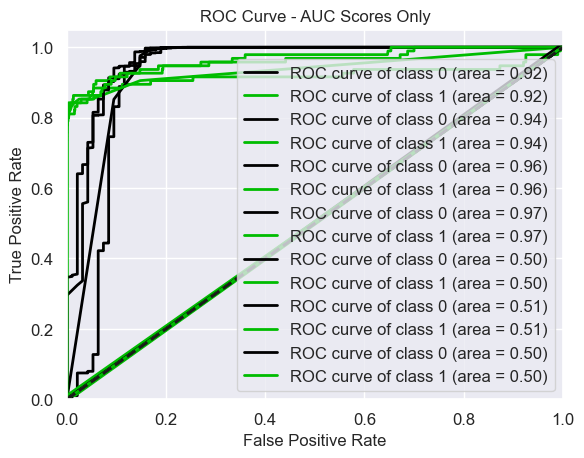

In [97]:
# let's plot the performance of the model based on ROC-AUC metric score.
# By comparing the actual response (y_test) with the predicted response values (X_pred)
# initialize the figure and axes
fig, ax = plt.subplots()

# plot ROC-AUC curve for each model
for name, model in models.items():
    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), ax=ax, plot_micro=False, plot_macro=False, title=name)

# set the title and labels for the plot
ax.set_title('ROC Curve - AUC Scores Only')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# show the plot
plt.show()


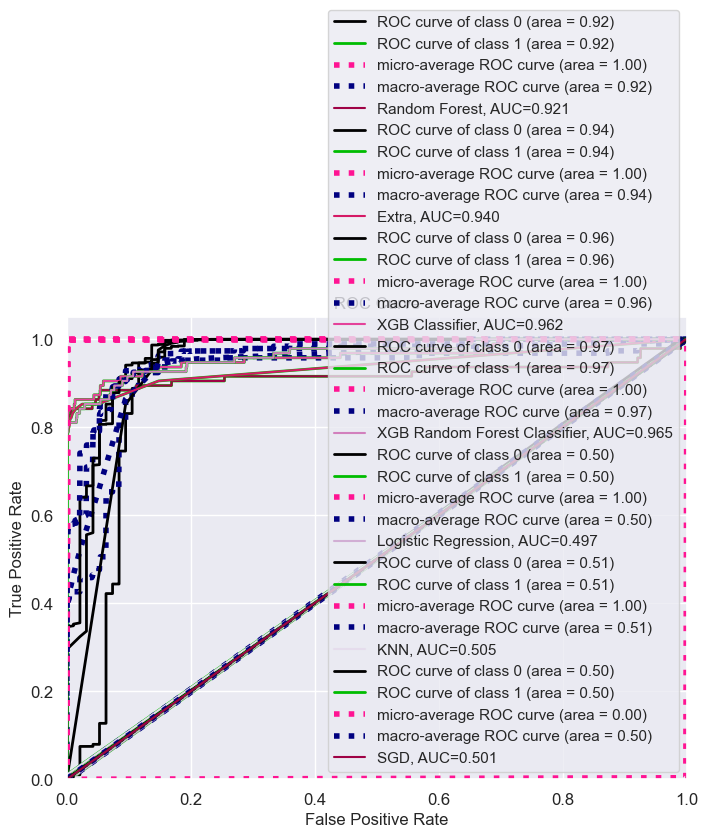

In [99]:
# finally let's plot the performance of the model based on ROC-AUC metric score for each model.
# By comparing the actual response (y_test) with the predicted response values (X_pred)
# initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# plot ROC-AUC curve for each model
for name, model in models.items():
    fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = metrics.auc(fpr, tpr)
    
    # plot ROC-AUC curve for the current model
    skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test), ax=ax, title=name)
    plt.plot(fpr, tpr, label=f"{name}, AUC={auc_score:.3f}")

# set the title and labels for the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
###############################################################################

##  Voting Classifier on Main Model
Having made our models with their default parameters, we can combine all classifiers to vote on predictions for us. Thus, **a voting classifier** is one of machine learning tectniques that put multiple classifiers to nake one final prediction. This is also known as an ensemble approach that can be used to improve the accuracy and also ensures the stability of predictions, most especially when models are prone to errors and /or susceptible to biases.

In [100]:
clf_vote=xgb.XGBClassifier(eval_metric=average_precision_score, n_jobs=-1, tree_method="hist", random_state=rand_state)
classifiers_stack=[ExtraTreesClassifier(n_jobs=-1),
                   RandomForestClassifier(n_jobs=-1),
                   xgb.XGBClassifier(eval_metric=average_precision_score, n_jobs=-1, 
                                     tree_method="hist", random_state=rand_state),
                   xgb.XGBRFClassifier(objective="binary:logistic", eval_metric=average_precision_score,
                                       n_jobs=-1, tree_method="hist", random_state=rand_state),
                   LogisticRegression(solver="liblinear",n_jobs=-1,max_iter=int(1e9), class_weight="balanced"),
                   KNeighborsClassifier(n_jobs=-1),
                   SGDClassifier(loss="modified_huber", n_jobs=-1,max_iter=int(1e9), class_weight="balanced")]
clf_stack = StackingCVClassifier(classifiers=classifiers_stack,
                                 meta_classifier=clf_vote,
                                 cv=kfold,
                                 verbose=False,
                                 use_probas=True,
                                 use_features_in_secondary=True)

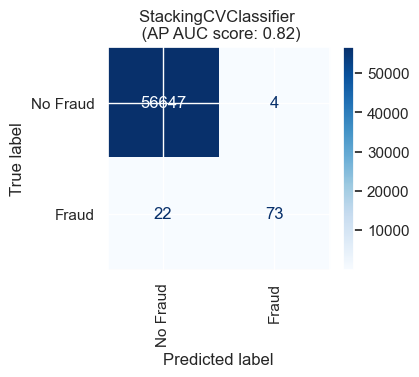

In [101]:
vtc ={"Stack": clf_stack }
print_scores(vtc, stack=True, result_prefix="_voting_stack")

### Plotting Voting Classifier Performance on Main Model

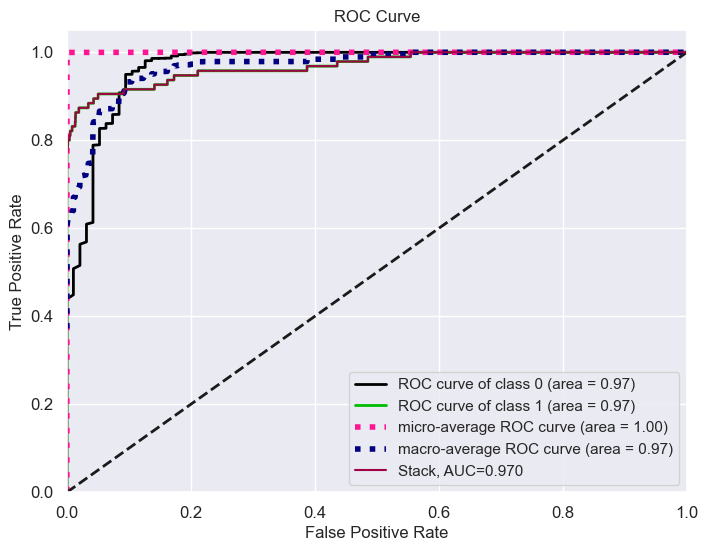

In [106]:
# Plotting the model performance forthe voting classifer on the main/actual model
# initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# plot ROC-AUC curve for each model
for name, model in vtc.items():
    fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = metrics.auc(fpr, tpr)
    
    # plot ROC-AUC curve for the current model
    skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test), ax=ax, title=name)
    plt.plot(fpr, tpr, label=f"{name}, AUC={auc_score:.3f}")

# set the title and labels for the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
################################################################################################################################

## Opimising Main Model
Let us optimise according to **Average Precision (AP)** scores 

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
100%|██████████| 40/40 [02:55<00:00,  4.38s/trial, best loss: 0.23747613241767274]


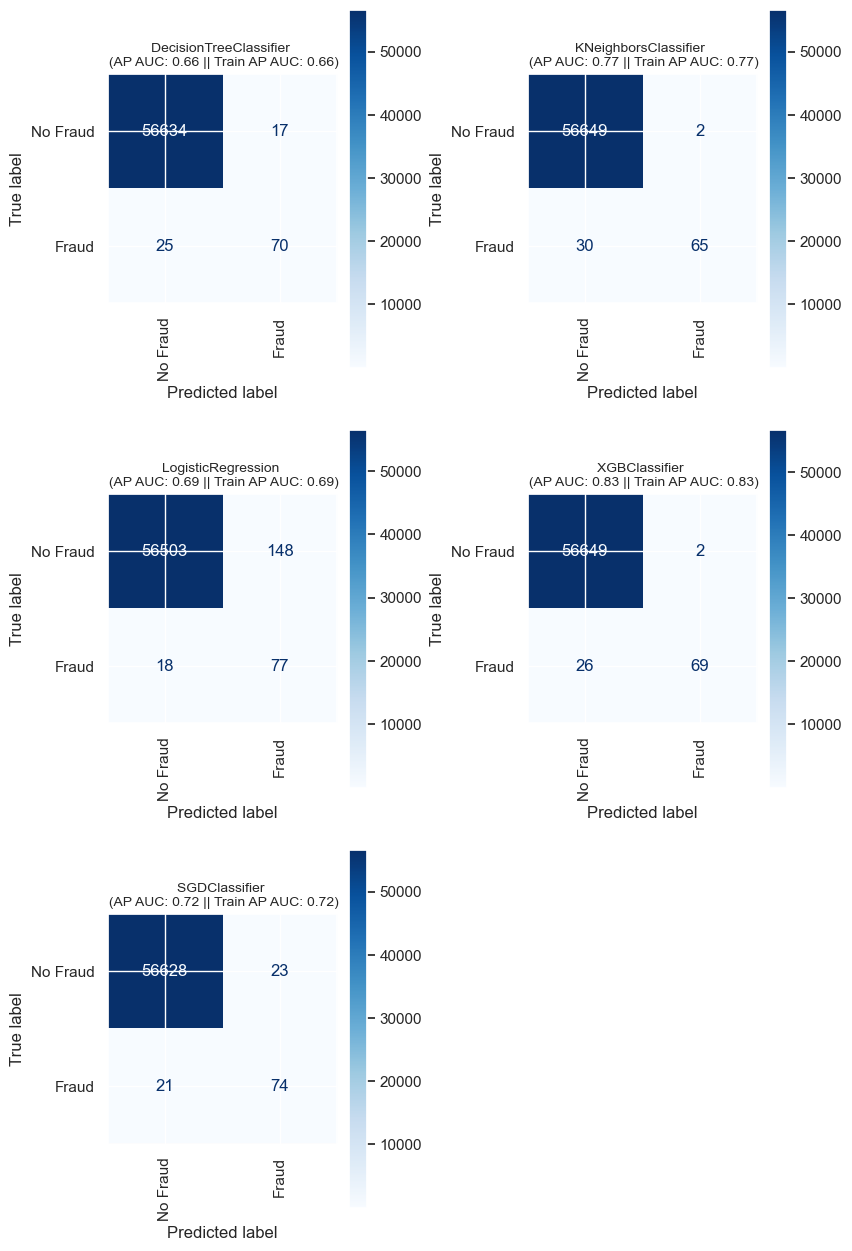

In [103]:
tree_clf_ap = tune_dtree()
log_reg_ap = tune_logreg() #takes longer time. 
knears_neighbors_ap = tune_knn()
xgb_est_ap = tune_xgb()
sgd_est_ap = tune_sgd_bayes()
models_with_params={"Decision Tree": tree_clf_ap,
                    "KNN": knears_neighbors_ap,
                    "Logistic Regression": log_reg_ap,
                    "XGB": xgb_est_ap, 
                    "SGD":sgd_est_ap}
print_scores(models_with_params,result_prefix="_tuned_ap")

### Plotting the Optimised Model Performance

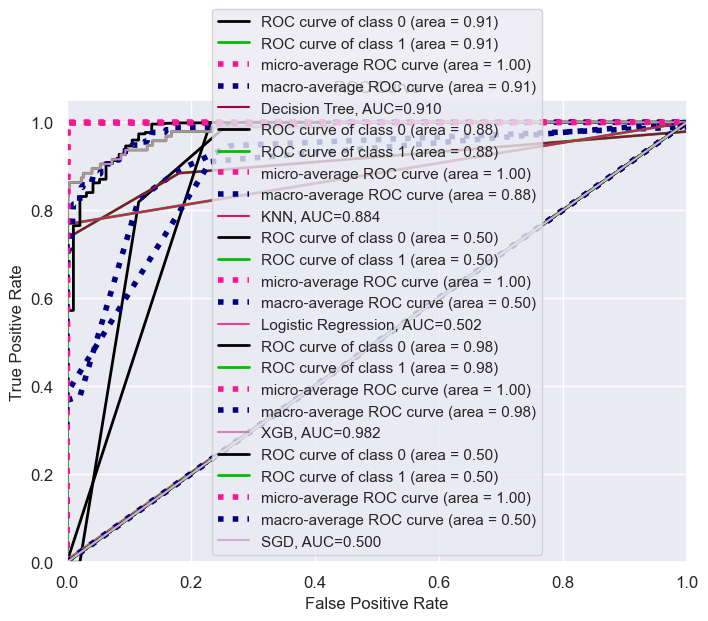

In [104]:
# initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# plot ROC-AUC curve for each model
for name, model in models_with_params.items():
    fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = metrics.auc(fpr, tpr)
    
    # plot ROC-AUC curve for the current model
    skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test), ax=ax, title=name)
    plt.plot(fpr, tpr, label=f"{name}, AUC={auc_score:.3f}")

# set the title and labels for the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
################################################################################################################################

## Voting Classifier on Tuned Model 

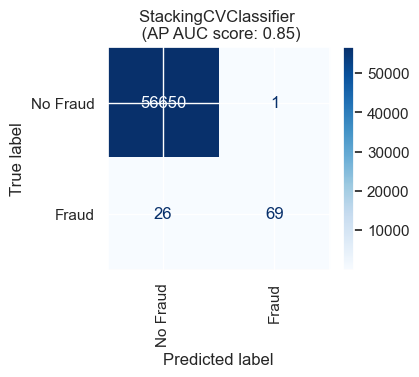

In [107]:
classifiers_tuned_ap=[tree_clf_ap, knears_neighbors_ap, xgb_est_ap, sgd_est_ap]# took log_reg_ap out due to longet run time
clf_stack_tuned_ap=StackingCVClassifier(classifiers=classifiers_tuned_ap,
                                 meta_classifier=clf_vote,
                                 cv=kfold,
                                 verbose=False,
                                 use_probas=True,
                                 use_features_in_secondary=True)
vtc ={"Stack": clf_stack_tuned_ap }
print_scores(vtc, stack=True, result_prefix="_voting_stack_tuned_ap")

### Plotting the Performance of the Optimised Voting Classifier

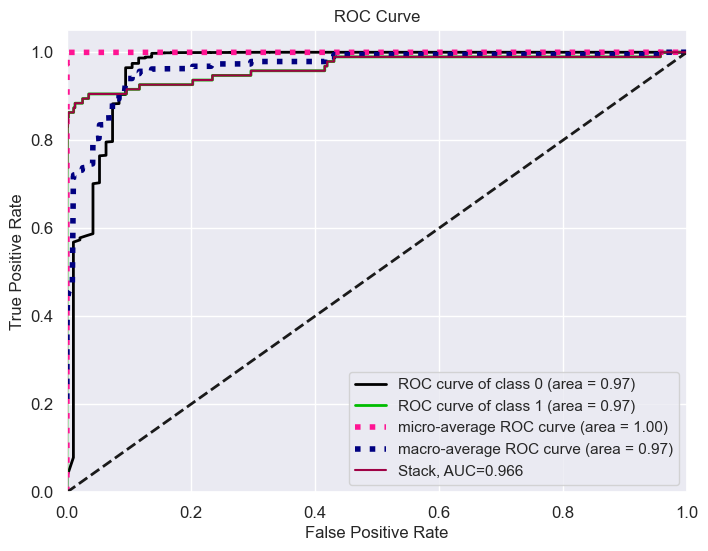

In [108]:
# Plotting the model perforance for the tunned voting classifier
# initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# plot ROC-AUC curve for each model
for name, model in vtc.items():
    fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = metrics.auc(fpr, tpr)
    
    # plot ROC-AUC curve for the current model
    skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test), ax=ax, title=name)
    plt.plot(fpr, tpr, label=f"{name}, AUC={auc_score:.3f}")

# set the title and labels for the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
################################################################################################################################

# Oversampling Data
For an imbalanced dataset, we can apply the ADASYN algorithm technique.

In [109]:
adsn_method = ADASYN(random_state=rand_state)
X_train_resampled, y_train_resampled = adsn_method.fit_resample(X_train_scaled, y_train)

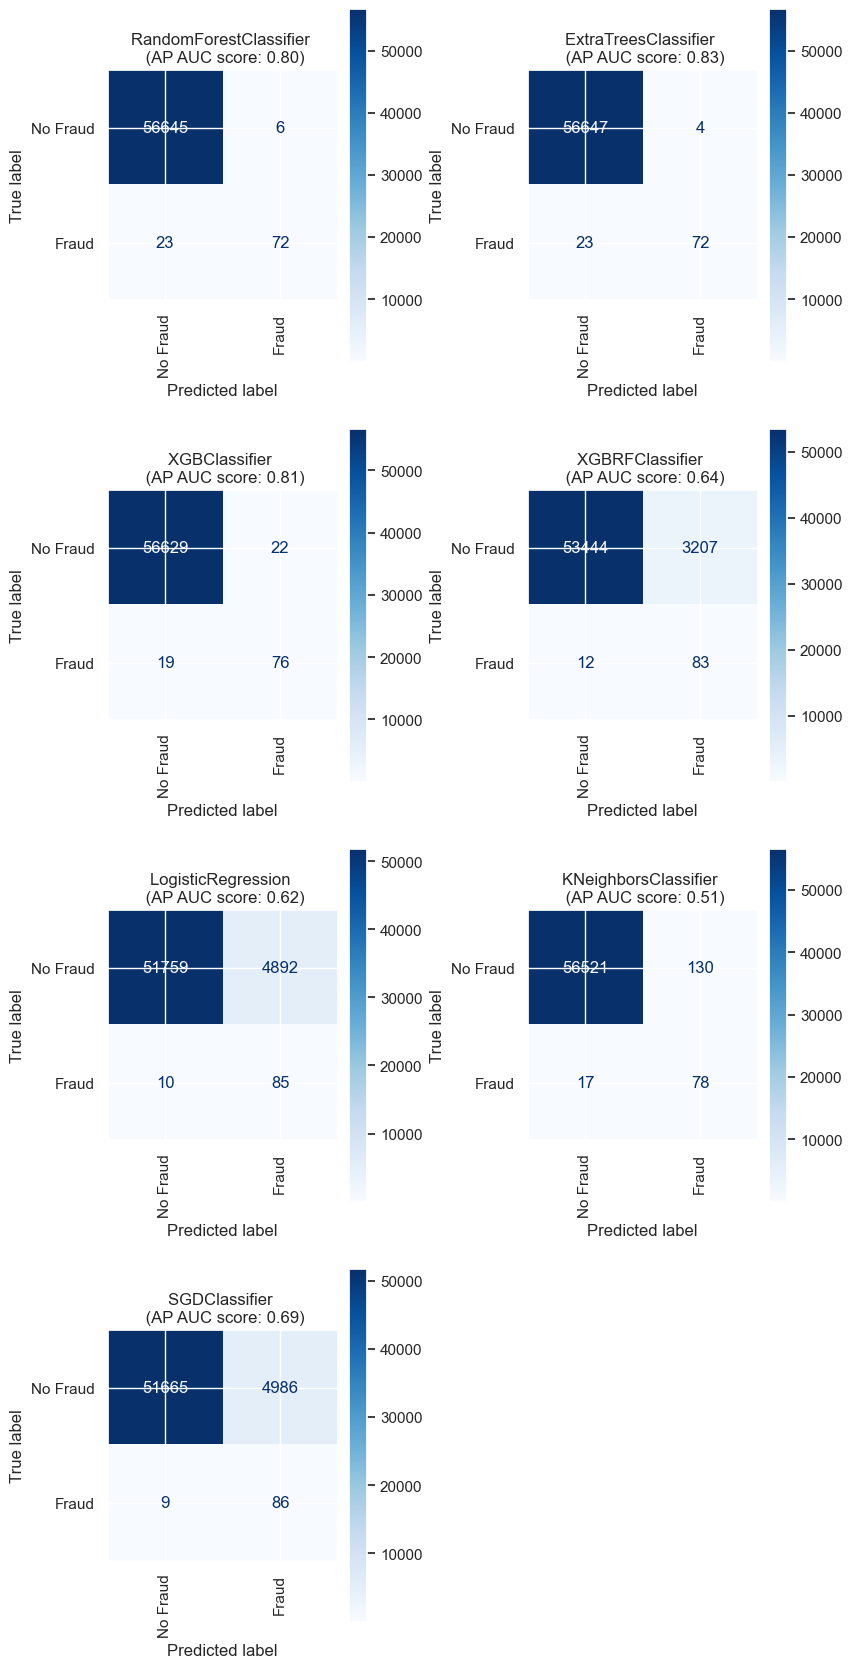

In [110]:
models = {"Random Forest":RandomForestClassifier(n_jobs=-1, random_state=rand_state),
          "Extra Trees":ExtraTreesClassifier(n_jobs=-1),
          "XGB Classifier": xgb.XGBClassifier(eval_metric=average_precision_score, n_jobs=-1, 
                                              tree_method="hist", random_state=rand_state),
          "XGB Random Forest Classifier": xgb.XGBRFClassifier(objective="binary:logistic", eval_metric=average_precision_score, 
                                                              tree_method="hist", random_state=rand_state),
          "Logistic Regression": LogisticRegression(n_jobs=-1),
          "KNN": KNeighborsClassifier(n_jobs=-1), 
          "SGD": SGDClassifier(n_jobs=-1, loss="log")}
print_scores(models, X_train=X_train_resampled, y_train=y_train_resampled, oversample=True, result_prefix="_adasyn")

## Plotting the Model Performance on the Oversample Data

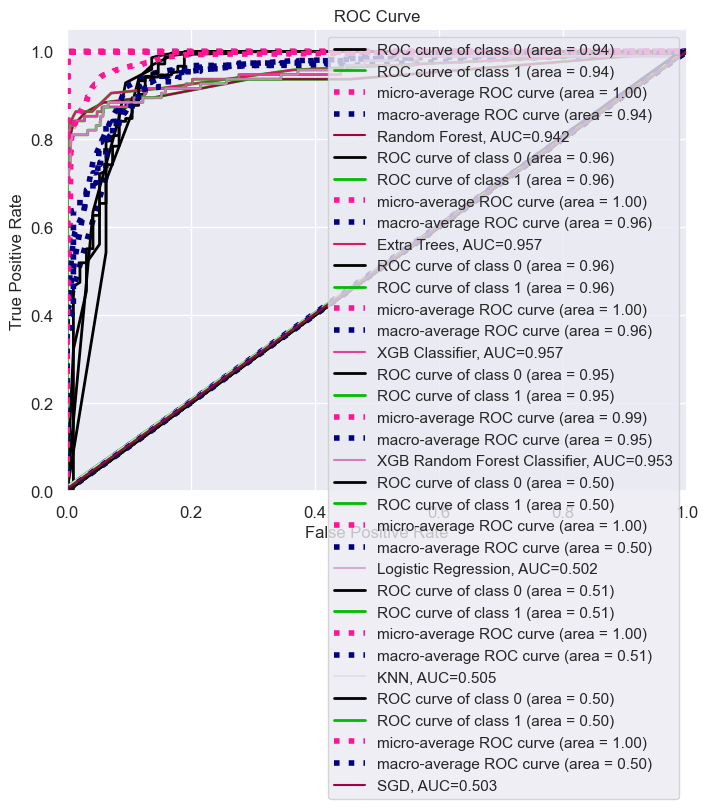

In [112]:
# Plotting the model performance of the Oversampling classifier
# initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# plot ROC-AUC curve for each model
for name, model in models.items():
    fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = metrics.auc(fpr, tpr)
    
    # plot ROC-AUC curve for the current model
    skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test), ax=ax, title=name)
    plt.plot(fpr, tpr, label=f"{name}, AUC={auc_score:.3f}")

# set the title and labels for the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Voting on Oversample Data Model

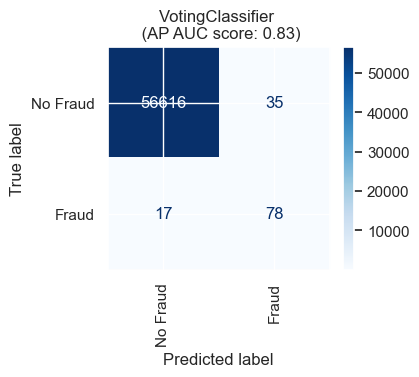

In [113]:
classifiers =[("Extra Trees", ExtraTreesClassifier(n_jobs=-1)),
              ("Random Forest", RandomForestClassifier(n_jobs=-1)),
              ("XGB Classifier", xgb.XGBClassifier(eval_metric=average_precision_score, n_jobs=-1, tree_method="hist")), 
              ("XGB Random Forest Classifier", xgb.XGBRFClassifier(objective="binary:logistic", n_jobs=-1, 
                                                                   tree_method="hist", eval_metric=average_precision_score)),
              ("Logistic Regression", LogisticRegression(max_iter=100000,n_jobs=-1)), 
              ("KNN", KNeighborsClassifier(n_jobs=-1)), 
              ("Decision Tree", DecisionTreeClassifier()),
              ("SGD", SGDClassifier(loss="log", n_jobs=-1))]

vtc ={"Vote": VotingClassifier(estimators=classifiers,voting="soft",n_jobs=-1) } 
print_scores(vtc, X_train=X_train_resampled, y_train=y_train_resampled, oversample=True, result_prefix="_voting_adasyn")

### Plotting the Model Performance of Oversample Voting Classifier

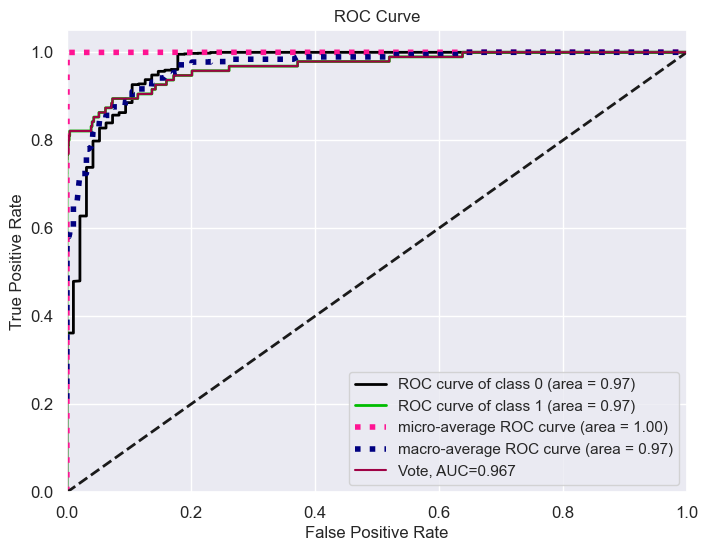

In [114]:
# Plotting the model performance of the voting classifier for the Oversampling classifier
# initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# plot ROC-AUC curve for each model
for name, model in vtc.items():
    fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = metrics.auc(fpr, tpr)
    
    # plot ROC-AUC curve for the current model
    skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test), ax=ax, title=name)
    plt.plot(fpr, tpr, label=f"{name}, AUC={auc_score:.3f}")

# set the title and labels for the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Oversampling Stacking Classifier

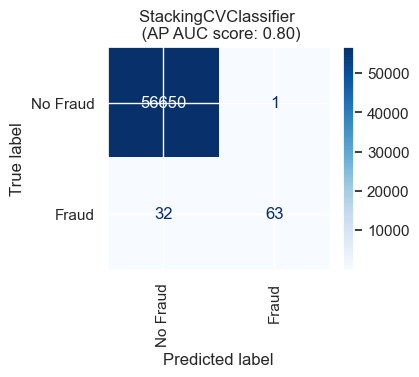

In [115]:
vtc ={"Stack": clf_stack }
print_scores(vtc, X_train=X_train_resampled, y_train=y_train_resampled, oversample=True, result_prefix="_voting_stack_adasyn")

### Plotting the Model Performance of Oversample Stack Classifier

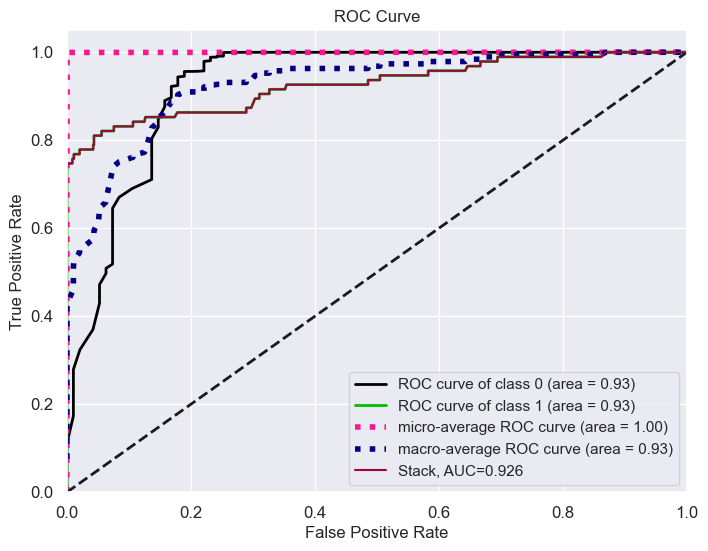

In [116]:
# Plotting the model performance of the stacking classifier for the Oversampling classifier
# initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# plot ROC-AUC curve for each model
for name, model in vtc.items():
    fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = metrics.auc(fpr, tpr)
    
    # plot ROC-AUC curve for the current model
    skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test), ax=ax, title=name)
    plt.plot(fpr, tpr, label=f"{name}, AUC={auc_score:.3f}")

# set the title and labels for the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()





















































































































































































































































































































































































































































































































































































































































































































































































































































































### Optimising Oversample Data Classifier

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


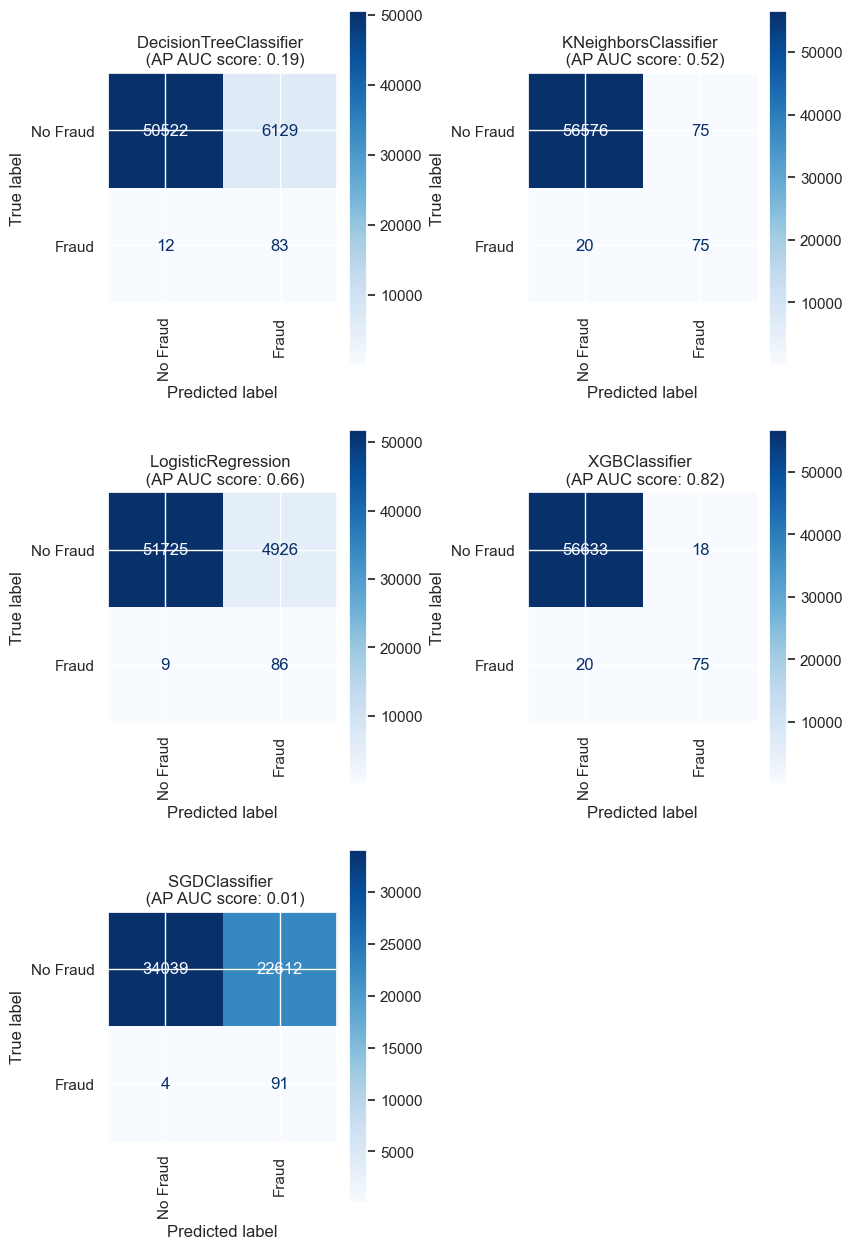

In [117]:
log_reg_adasyn_ap = tune_logreg(X=X_train_resampled, y=y_train_resampled) #takes longer runtime
tree_clf_adasyn_ap = tune_dtree(X=X_train_resampled, y=y_train_resampled)
knears_neighbors_adasyn_ap = tune_knn(X=X_train_resampled, y=y_train_resampled)
xgb_est_adasyn_ap = tune_xgb(X=X_train_resampled, y=y_train_resampled)
models_with_params={"Decision Tree": tree_clf_adasyn_ap,
                    "KNN": knears_neighbors_adasyn_ap,
                    "Logistic Regression": log_reg_adasyn_ap, #longer runtime
                    "XGB": xgb_est_adasyn_ap, 
                    "SGD":sgd_est_ap}
print_scores(models_with_params, X_train=X_train_resampled, y_train=y_train_resampled, oversample=True, result_prefix="_adasyn_tuned_ap")

### Plotting the Optimised Model Performance Oversample Data 

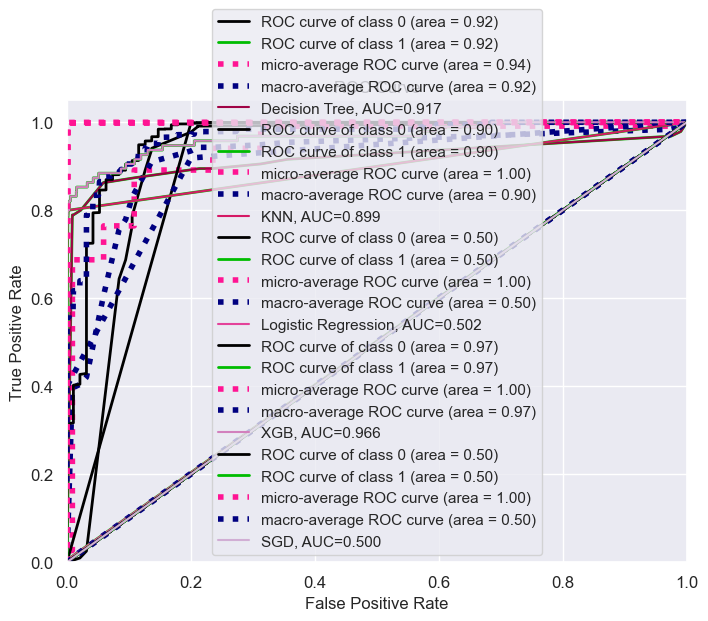

In [118]:
# Plotting the model performance of the optimised Oversampling classifier
# initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# plot ROC-AUC curve for each model
for name, model in models_with_params.items():
    fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = metrics.auc(fpr, tpr)
    
    # plot ROC-AUC curve for the current model
    skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test), ax=ax, title=name)
    plt.plot(fpr, tpr, label=f"{name}, AUC={auc_score:.3f}")

# set the title and labels for the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Voting on Tunned Oversampling Classifier

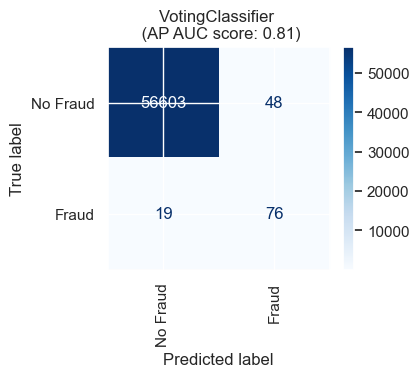

In [119]:
classifiers =[("XGB Classifier", xgb_est_adasyn_ap),
              #("Logistic Regression", log_reg_adasyn_ap),
              ("KNN", knears_neighbors_adasyn_ap),
              ("Decision Tree", tree_clf_adasyn_ap)]
vtc ={"Vote": VotingClassifier(estimators=classifiers,voting="soft",n_jobs=-1) }    
print_scores(vtc, X_train=X_train_resampled, y_train=y_train_resampled, oversample=True, result_prefix="_voting_adasyn_tuned_ap")

### Plotting the Optimised Voting Model Performance on Oversample Data

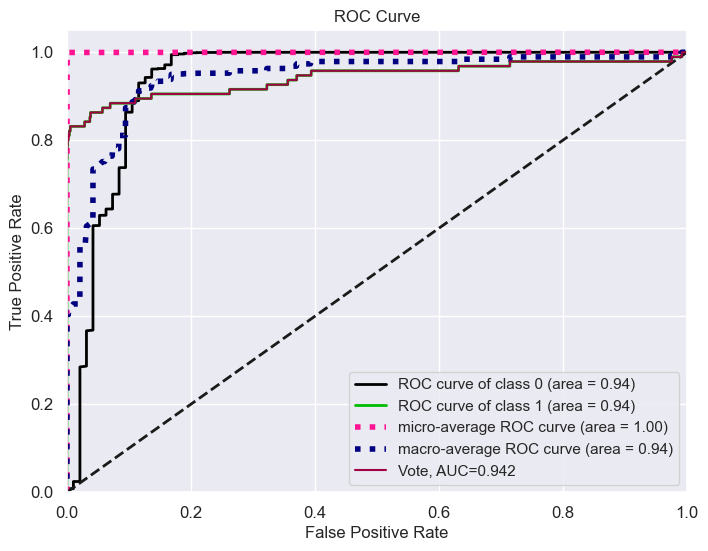

In [120]:
# Plotting the model performance of the voting classifier for the optimised Oversample model
# initialising the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# plotting ROC-AUC curve for each model
for name, model in vtc.items():
    fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = metrics.auc(fpr, tpr)
    
    # plotting ROC-AUC curve for the current model
    skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test), ax=ax, title=name)
    plt.plot(fpr, tpr, label=f"{name}, AUC={auc_score:.3f}")

# setting the title and labels for the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
################################################################################################################################

# Undersampling Data
We will begin with random sampling for the dimenensionality reduction and correlation matrix. After, we will explore Near Miss algorithm for the original undersampling modelling.

In [121]:
X_scaled_for_rus = crecard_df.drop(columns="Class")
y_scaled_for_rus = crecard_df.Class
X_scaled_for_rus = scaler.fit_transform(X_scaled_for_rus)

In [122]:
rus=RandomUnderSampler(random_state=rand_state)
X_rus, y_rus=rus.fit_resample(X_scaled_for_rus, y_scaled_for_rus)

Let's see the proportion of fraud to genuine transactions after undersampling.

In [123]:
print('Genuine:', y_rus.value_counts()[0], '/', round(y_rus.value_counts()[0]/len(y_rus) * 100,2), '% of the dataset')
print('Frauds:', y_rus.value_counts()[1], '/',round(y_rus.value_counts()[1]/len(y_rus) * 100,2), '% of the dataset')

Genuine: 492 / 50.0 % of the dataset
Frauds: 492 / 50.0 % of the dataset


In [124]:
Counter(y_rus)

Counter({0: 492, 1: 492})

In [ ]:
################################################################################################################################

## Undersampling by Dimension Technique
Let us apply **Dimensionality Reduction Technique**

In [125]:
# T-SNE Implementation
X_reduced_tsne = TSNE(n_components=2, random_state=rand_state, n_jobs=-1).fit_transform(X_rus)

# PCA Implementation
X_reduced_pca = PCA(n_components=2, random_state=rand_state).fit_transform(X_rus)

# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=2, random_state=rand_state).fit_transform(X_rus)

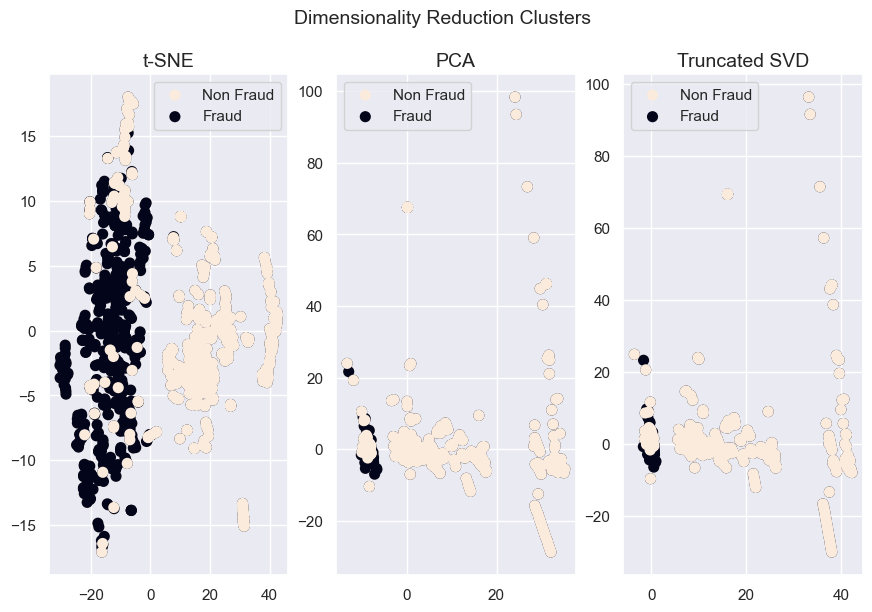

In [126]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10.5,6.5))
f.suptitle('Dimensionality Reduction Clusters', fontsize=14)

# scatter plot for t-SNE 
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_rus == 0), label='Non Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_rus == 1), label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend()

# scatter plot for PCA 
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_rus == 0), label='Non Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_rus == 1), label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend()

# scatter plot for TruncatedSVD 
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_rus == 0), label='Non Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_rus == 1), label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend()

plt.show()

In [ ]:
################################################################################################################################

## Undersampling by NearMiss Technique
**NearMiss Technique** is our next step

In [127]:
nm = NearMiss(version=3)
X_train_nm, y_train_nm = nm.fit_resample(X_train_scaled, y_train)

In [128]:
Counter(y_train_nm)

Counter({0: 359, 1: 378})

In [129]:
nm_df=pd.DataFrame(X_train_nm, columns=crecard_df.drop("Class", axis=1).columns)
nm_df["Class"]=y_train_nm

Let us investigue and confirm if our correlation got better with clarity.

### Correlation Plot on Undersample Data

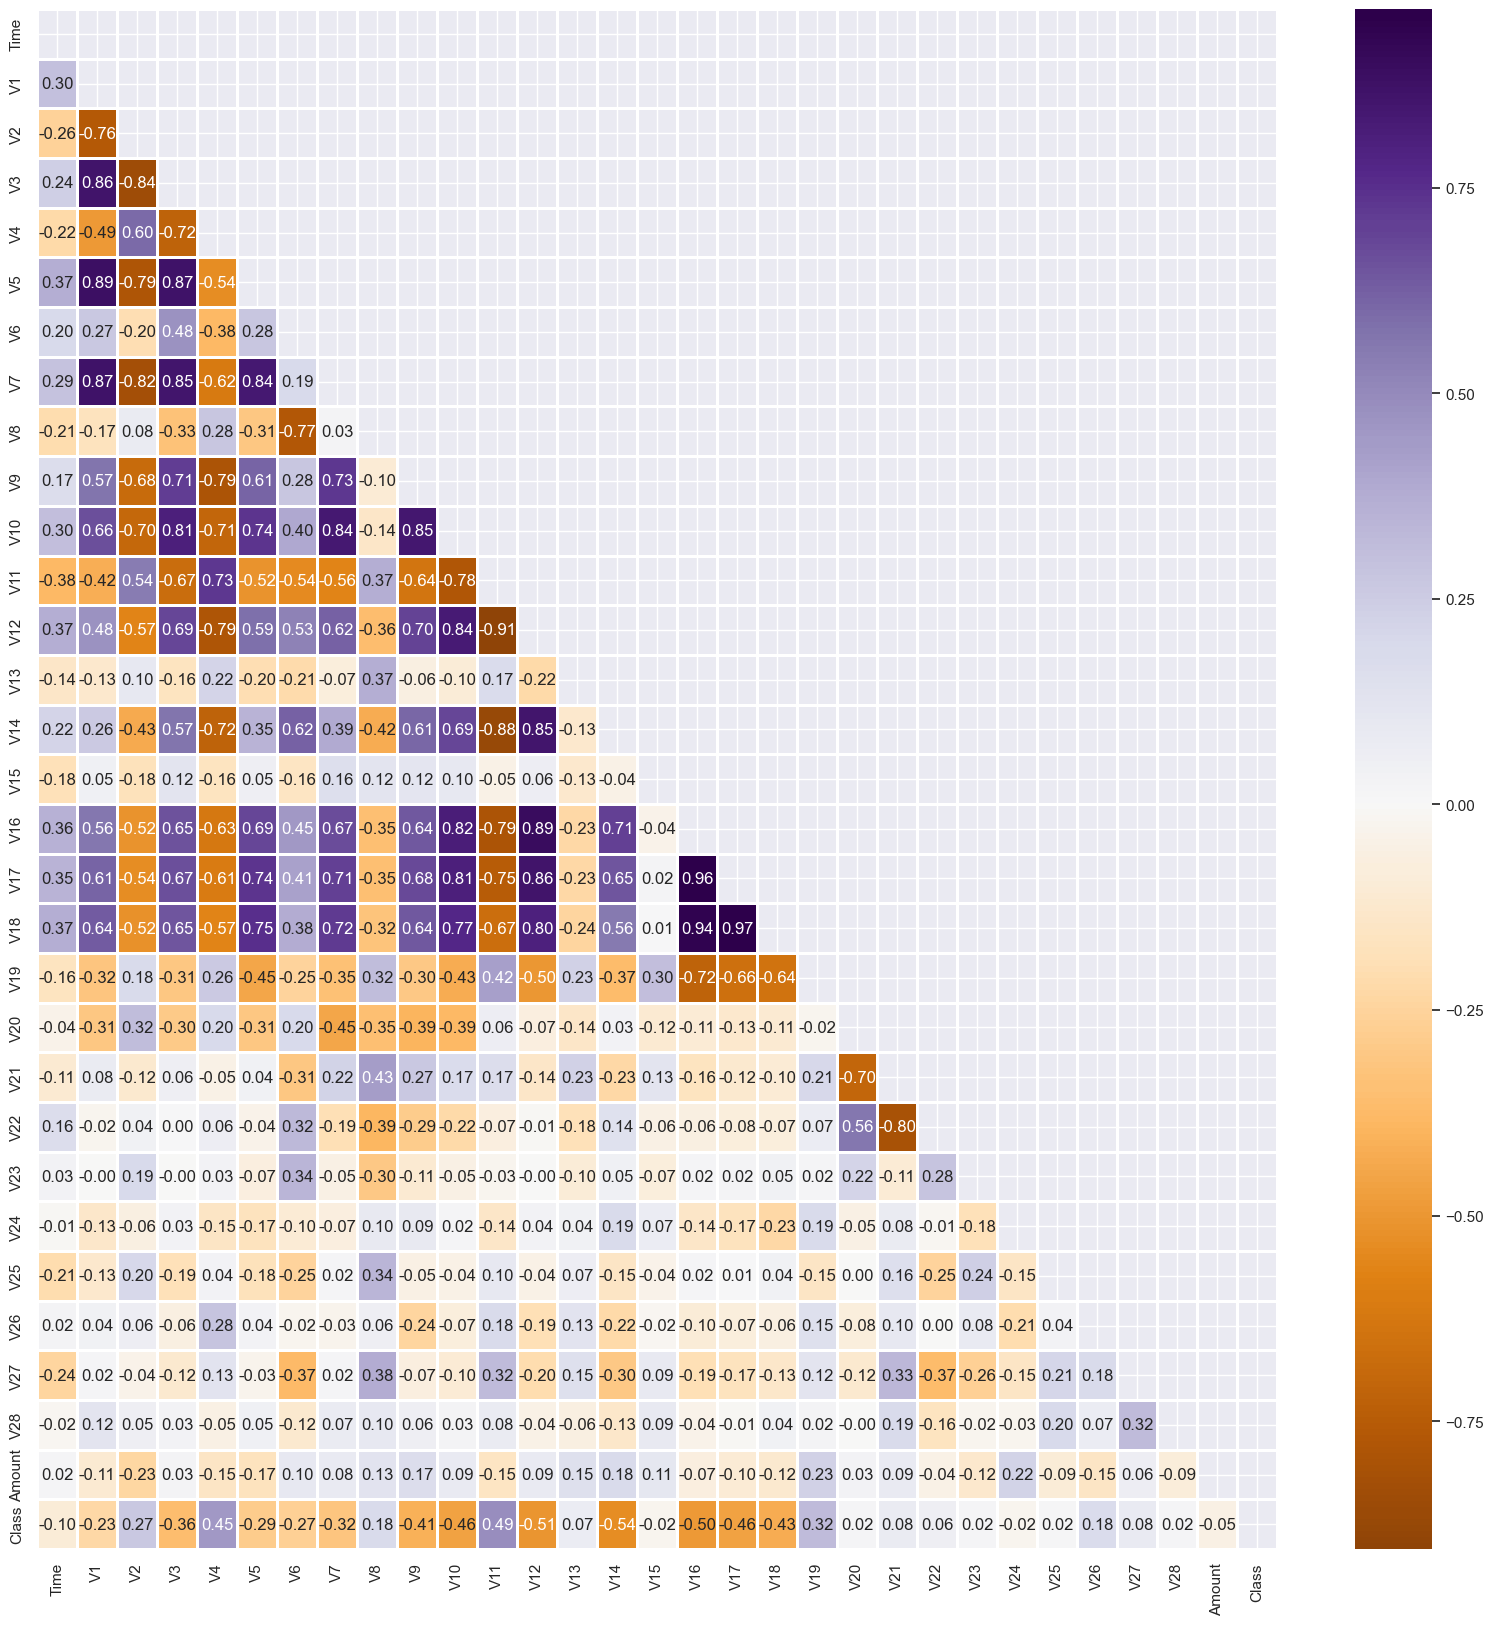

In [131]:
# Correlation plot for undersample data.
plt.figure(figsize = (20,20))
corr = nm_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # Generating a mask for the upper triangle 
ax = sns.heatmap(corr, cmap='PuOr', mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [ ]:
################################################################################################################################

## Undersample Data Classifier

We will now use our undersampling data for the classifiers

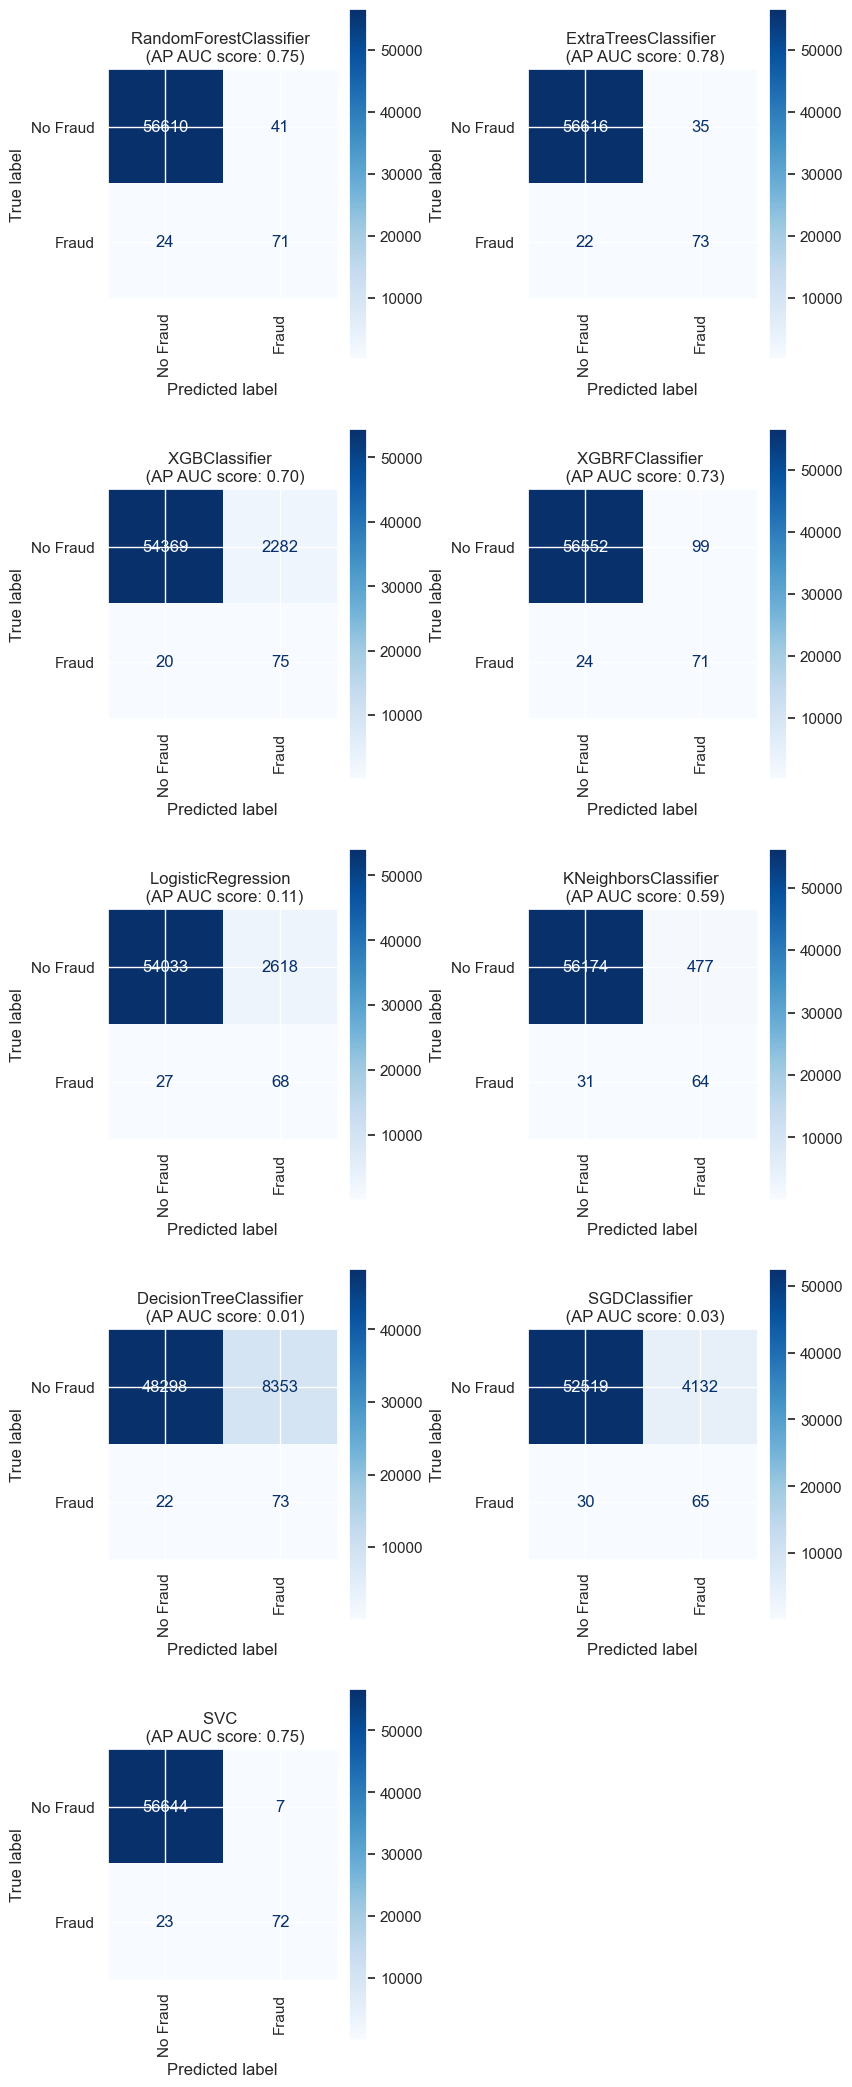

In [132]:
models = {"Random Forest":RandomForestClassifier(n_jobs=-1, random_state=rand_state),
          "Extra":ExtraTreesClassifier(n_jobs=-1),
          "XGB Classifier": xgb.XGBClassifier(eval_metric=average_precision_score, n_jobs=-1, 
                                              tree_method="hist", random_state=rand_state),
          "XGB Random Forest Classifier": xgb.XGBRFClassifier(objective="binary:logistic", n_jobs=-1, tree_method="hist", 
                                                              eval_metric=average_precision_score, random_state=rand_state),
          "Logistic Regression": LogisticRegression(n_jobs=-1),
          "KNN": KNeighborsClassifier(n_jobs=-1), 
          "Decision Tree": DecisionTreeClassifier(),
          "SGD": SGDClassifier(loss="log", n_jobs=-1),
          "Support Vector Classifier":SVC(probability=True)}
print_scores(models, X_train=X_train_nm, y_train=y_train_nm, undersample=True, result_prefix="_us")

### Plotting the Model Performance on Undersample Data

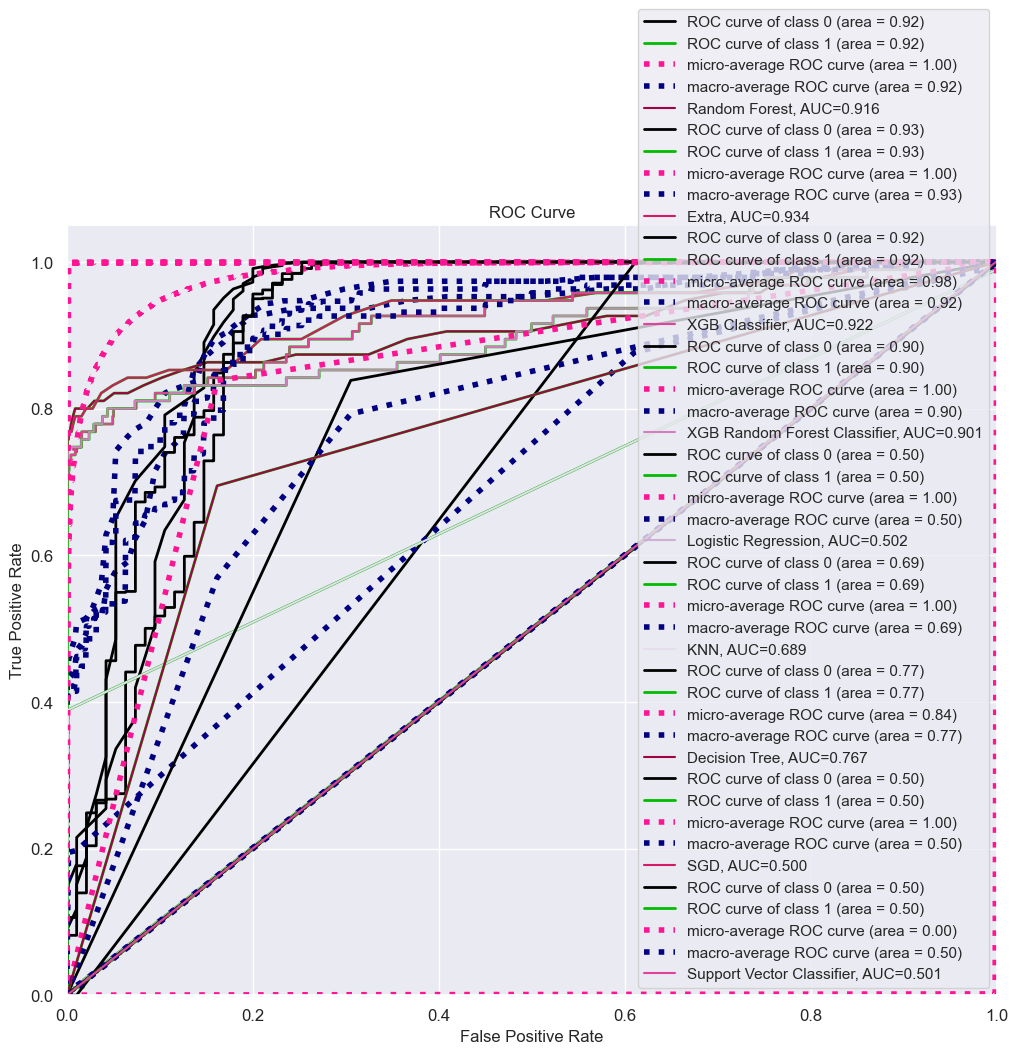

In [134]:
# initialize the figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# plot ROC-AUC curve for each model
for name, model in models.items():
    fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = metrics.auc(fpr, tpr)
    
    # plot ROC-AUC curve for the current model
    skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test), ax=ax, title=name)
    plt.plot(fpr, tpr, label=f"{name}, AUC={auc_score:.3f}")

# set the title and labels for the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Voting Classifier on Undersample Data

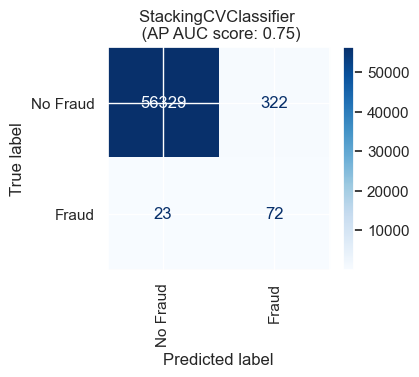

In [135]:
# Voting classifier on the undersampling data
vtc ={"Stack": clf_stack }
print_scores(vtc, X_train=X_train_nm, y_train=y_train_nm, undersample=True, result_prefix="_voting_stack_us")

### Plotting the Voting Model Performance on the Undersample Classifier

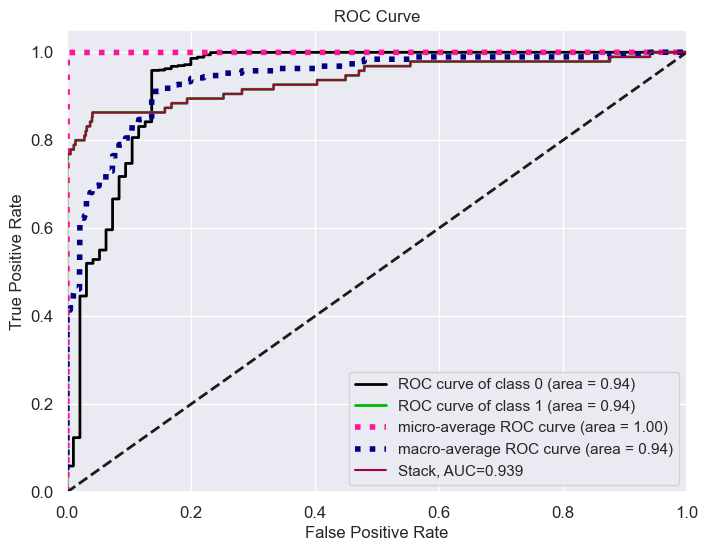

In [136]:
# initialize the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# plot ROC-AUC curve for each model
for name, model in vtc.items():
    fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = metrics.auc(fpr, tpr)
    
    # plot ROC-AUC curve for the current model
    skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test), ax=ax, title=name)
    plt.plot(fpr, tpr, label=f"{name}, AUC={auc_score:.3f}")

# set the title and labels for the plot
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
################################################################################################################################

# Model Evaluation
Finally, we will print and tabulate our scores for the various models. Since we are dealing with imbalanced dataset, we will evaluate the performance of each model with ROC-AUC, Precision, Recall, and Precision-Recall scores. We will also see how well some model performed during training but under-performed during cross-validation. 

In [137]:
# We will drop accuracy because we don't need because of imbalanced dataset
models_df = results.drop("Accuracy", axis=1).sort_values(by="Precision-Recall Score",ascending=False).style.format(precision=3)\
                    .highlight_max(subset=["Precision-Recall Score","ROC-AUC Score","Train CV Score"], color ='lightgreen')

In [138]:
models_df

## Exporting Results to Excel

In [141]:
# Create an Excel worksheet or file with the name "Output" before running this code
# Export our results dataframe to excel. 
with pd.ExcelWriter('output.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    models_df.to_excel(writer, sheet_name='results')

As deduced from our analysis, imbalanced dataset can be tricky to work with. In most instances it gave a good performance results, at another time it gives almost a negative prediction. Even with a good performance, the metrics used to measure it affected its evaluation as not all metrics are ideal for measuring an imbalanced data. 

The imbalance in our dataset is characterised by the predominace of genuine or no fraud over the presence of fraud. Due to this using accuracy to measure a model performance will be a step in the wrong direction. Hence, we employed other performance matrics to measure the effectiveness of the models. 

To achieve the goal of this paper, using these metrics will guarantee the efficient evaluation of models. Therefore, **precision, recall, precision-recall and receiver operating characteristic (ROC) and Area Under Curve (AUC)** were used as the performance metrics. 

In general, we could deduce from our result table that the optimised (tunned) classifiers performed extremely well as compared to the actual classifiers. Using **ROC-AUC scores**, all the models performed well with **Decision Tree Classifier with undersample data** achieved the lowest performance with a score of **0.75** and **Tuned Voting StackingCVClassifier** with oversampling data being the best model with a score of **0.97**. 

Tuned Voting StackingCVClassifier again achieved a higher score of **0.98, 0.96** and **0.83** for Precision, Recall and Precision-Recall repectively.


Whereas **AUC-ROC and AUPRC** gave a fairly good evaluation, confusion matrix returned highly performed evaluations of most models Whereas **Decision Tree Classifier** for undersampling data once again recorded a lower performance of **0.003, 0.3** and  **0.004** for Precision, Recall and Precision-Recall respectively. 

We could again observe from our analysis that models built with undersample data performed poorly where those built with random and oversample data performed good and better respectively.

### Plot the Metrics for Measuring Mode Performance 
The models are represented by numbers (1-36) for all the 36 models.

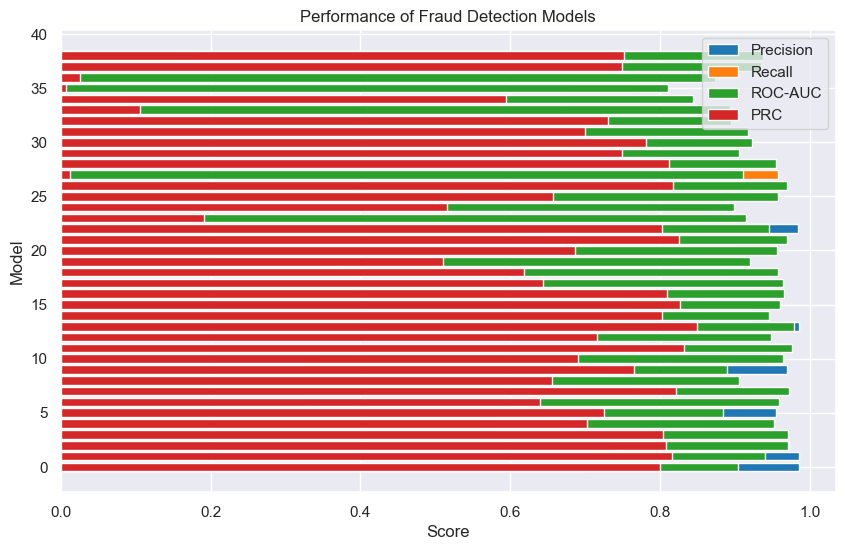

In [142]:
# Plotting the model performance
# Set figure size
plt.figure(figsize=(10, 6))

# Define color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create horizontal bar plots for precision, recall, ROC-AUC, and precision-recall
plt.barh(results.index, results['Precision'], color=colors[0], label='Precision')
plt.barh(results.index, results['Recall'], color=colors[1], label='Recall')
plt.barh(results.index, results['ROC-AUC Score'], color=colors[2], label='ROC-AUC')
plt.barh(results.index, results['Precision-Recall Score'], color=colors[3], label='PRC')

# Add chart title and axis labels
plt.title('Performance of Fraud Detection Models')
plt.xlabel('Score')
plt.ylabel('Model')

# Add legend
plt.legend()

# Display plot
plt.show()

As analysed, most of the models performed well using the **Area Under Curve (AUC)** as a metric. Some of the models did fairly well when **Precision** is the metric to measure performance whereas **Recall** as metric measured the performance of very few models. Almost all the models did fairly well using **Precision-Recall** as a performance metric. 

We will plot the various metrics below.

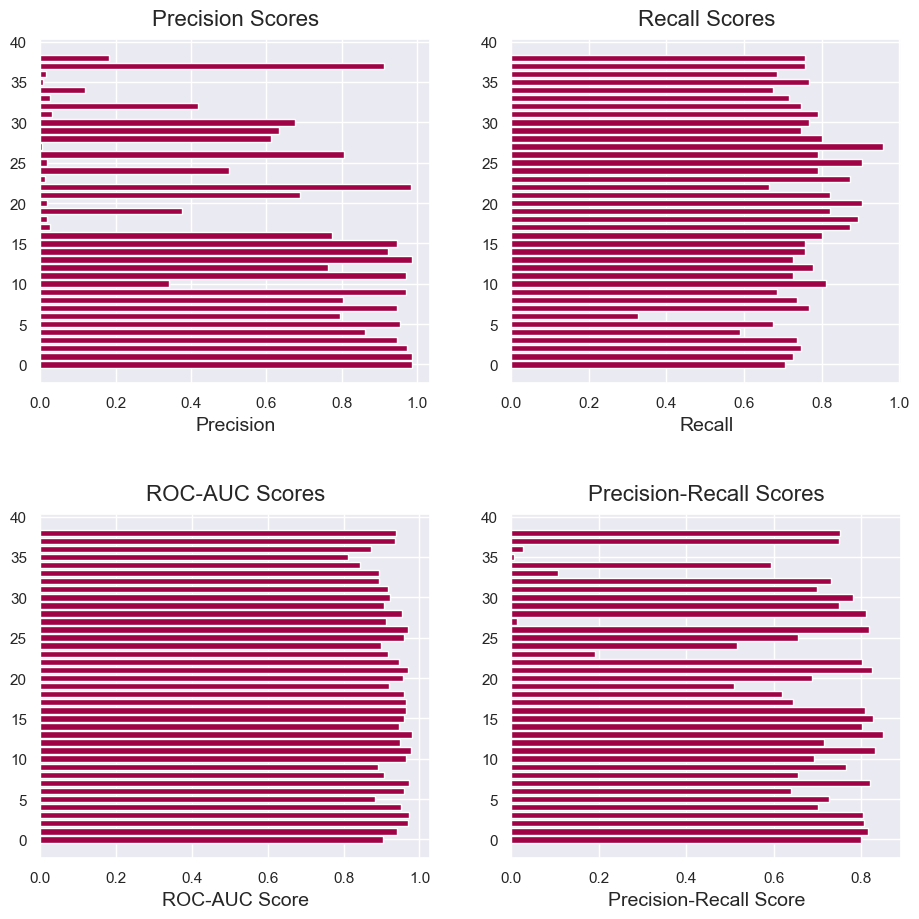

In [143]:
# Plotting metrics for models performance.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Precision scores
axes[0, 0].barh(results.index, results["Precision"])
axes[0, 0].set_xlabel("Precision", fontsize=14)
axes[0, 0].set_title("Precision Scores", fontsize=16, pad=10)

# Recall scores
axes[0, 1].barh(results.index, results["Recall"])
axes[0, 1].set_xlabel("Recall", fontsize=14)
axes[0, 1].set_title("Recall Scores", fontsize=16, pad=10)

# ROC-AUC scores
axes[1, 0].barh(results.index, results["ROC-AUC Score"])
axes[1, 0].set_xlabel("ROC-AUC Score", fontsize=14)
axes[1, 0].set_title("ROC-AUC Scores", fontsize=16, pad=10)

# Precision-Recall scores
axes[1, 1].barh(results.index, results["Precision-Recall Score"])
axes[1, 1].set_xlabel("Precision-Recall Score", fontsize=14)
axes[1, 1].set_title("Precision-Recall Scores", fontsize=16, pad=10)

fig.tight_layout(pad=3.0)
plt.show()


**In this project, we have susscessfuly built and evaluated machine learning models to detect credit card fraud**. 

In [ ]:
################################################################################################################################

# Explainable Artificial Intelligence

How do we know as, Machine Learning architects, the models we build to answer business questions can be trusted? In this dissertation project, we have deployed new models called **Fraud Detectors** which will analyse all of clients' transactions and flag one or more transactions for an online purchase as potentially fraud. 

How confidence can banks and other financial services can be that these **AI models** are probably right and that the transactions flagged should be investigated futher or denied? Superficially, these business cannot make that call, not even we as data scientists could determine this becuase we donnot know anything about the model except the block of codes we execute to build them. 

What goes on within the hidden layers of the models to return these predictions is not seen and hence, referred to as a **"Black Box"**. It's explanability is physicall impossible because we have no idea what actually went into those calculations to return the final predictions. When it comes to the application of artificial intelligence, not even engineers or data scientists who created the algorithm can fully understand or better explain what exactly happened inside them for a specific instance and result. 

In spite of this hinderance, there is a solution to the problem. The solution in this instance is what is called **Explainable Artifical Intelligence (AI)** which explains the predicitons of classifiers by the manchine learning algorithm. It also allows humans to understand how a machine learning model generates its results and consequently, we can build trust in it's results. Explaianable Artificial Intelligence consists of **three main methods**:
* The prediction
* The accuracy or performance
* Its tracebility

Prediction and accuracy together with traceability addresses tecnology requirement and then there is decision understanding whcih also addresses human needs. traceability can limit the manner decisions be made, narrowing down the scope for machine learning rules and features. One traceability technique is called feature importance, which compares the contributions of each feature in the prediction procesw showing traceability links and dependencies, especially in neaural networks. 

Decension and understanding is the multi-human factor about education and informing us to build trust in machine learning models as well as help data scientists and businesses understand how decisions were made based on the model results. This information could be the primary factors why a transaction was flagged as fraudulentand the entent which those factors influenced business decisions. Was it the transaction amount or was it the location where the transaction took place and time that were flagged by the model? 

Explainable artificail intelligence transcends just interpretating model outcomes but also about troubleshooting and imroving model performance. It gives us the opportunites to investigate model bahaviours through tracking model insights on deployment dwployment status, fainess, quality, and drift. Machine learning performance can diminish over time since production data differs from training data. By leveraging on the importance of interpretability of machine learning algorithms, we can scrutinise and analyse our models. We can again generate alerts when models deviate from the intended outcomes and perform inadequately as such **predicting numerous false positive fraudulents transactions** (Rudin C., 2019, C Molnar, 2020 ).  There are some popular Machine Learning interpretability techniques such as:
* Partial Dependencies Plots (PDP)
* Local Interpretable Model-Agnostic Explanations (LIME)
* SHapley Addictive exPlanations (SHAP)
* Class Activation Mapping
* Feature importance 

The most popular technique widely used for the interpretation of artificial interligence and machine learning results is **Local Interpretable Model-agnostic Explanation (LIME)**. In this project, we will use **LIME** to explain how our model arrived at their predictions.  

In [95]:
# Load the credit card dataset
df = pd.read_csv('creditcard.csv')

# Split the dataset into features and labels
X = df.drop("Class", axis=1)
y = df["Class"].values

# Split the dataset into training and testing sets
rand_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state, stratify=y)

# Create the random forest model
rf_model = RandomForestClassifier(random_state=rand_state)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Create the explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values,
                                                   feature_names=X_test.columns.tolist(), # This is the new data 
                                                   class_names=['Not Fraud', 'Fraud'],
                                                   mode="classification",
                                                   discretize_continuous=True)

# Select a random sample from the test set
sample = X_test.iloc[[20]]

# Explain the model's prediction for the sample using LIME
exp = explainer.explain_instance(sample.values[0], rf_model.predict_proba, num_features=5)

# Print the explanation for the prediction
exp.show_in_notebook(show_table=True, show_all=True)


# References:

* Rudin, C., 2019. Stop explaining black box machine learning models for high stakes decisions and use interpretable models instead. Nature machine intelligence, 1(5), pp.206-215.

* Molnar, C., 2020. Interpretable machine learning. Lulu. com.